In [257]:
from FFNN import NeuralNetwork, train_network, train_network_momentum, train_network_stochastic_momentum
import activation_functions as af
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np



### Generate data
Using the same function and seed for generating data as in project 1.

In [258]:
def generate_data(n, noise = True):
    # Fixed seed value to ensure consisten results across runs
    seed = 42
    np.random.seed(seed)
    # Creating an array with equally spaced data
    x = np.linspace(-1, 1, n)
    # Runges equation with noise
    if noise:
        y = 1 / (1 + 25*x**2) +  np.random.normal(0, 0.1, size=n)
    else:
        y = 1 / (1 + 25*x**2)
    return x, y


In [259]:
x, y = generate_data(50, noise = False)
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [260]:

# Split into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a validation set from the training data
# (60% train, 20% val, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)


In [261]:
# Scale inputs
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_val   = scaler.transform(X_val)
x_test  = scaler.transform(X_test)

In [262]:
#Initialize NN
nn = NeuralNetwork(
    network_input_size=X_train.shape[1],
    layer_output_sizes=[50, 100, 1],
    activation_funcs=[af.sigmoid, af.sigmoid, af.identity],
    cost_func=af.mse)


train_network_stochastic_momentum(nn, X_train, y_train, eta=0.01, epochs=100)

y_val_pred = nn.predict(X_val)
val_loss = af.mse(y_val, y_val_pred)
print("Validation loss:", val_loss)

y_test_pred = nn.predict(X_test)
test_loss = af.mse(y_test, y_test_pred)
print("Final test loss:", test_loss)

print(y_test_pred)



Validation loss: 0.021246223396263676
Final test loss: 0.030612179824647496
[[0.27222846]
 [0.19256502]
 [0.53429651]
 [0.08100251]
 [0.4428323 ]
 [0.0760918 ]
 [0.61912655]
 [0.62411983]
 [0.46204411]
 [0.5176622 ]]


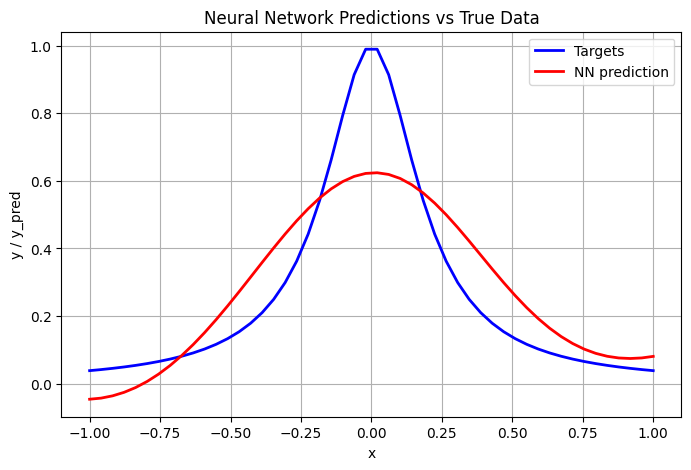

In [263]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', linewidth=2, label='Targets')
plt.plot(x, nn.predict(x), color='red', linewidth=2, label='NN prediction')
plt.title("Neural Network Predictions vs True Data")
plt.xlabel("x")
plt.ylabel("y / y_pred")
plt.legend()
plt.grid(True)
plt.show()


i = 10, j = 10
Validation loss: 0.01770253464123027
Final test loss: 0.030928774540423736
[[ 0.19955328]
 [ 0.11095814]
 [ 0.45702982]
 [-0.02492508]
 [ 0.41224492]
 [-0.0833143 ]
 [ 0.58313716]
 [ 0.5961507 ]
 [ 0.36679436]
 [ 0.498345  ]]


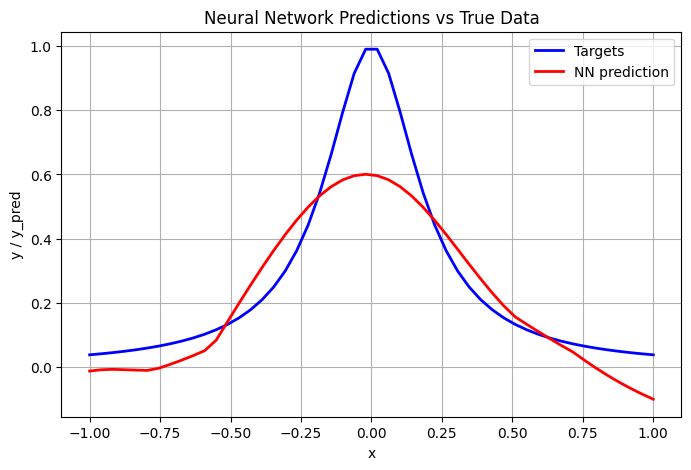

i = 10, j = 20
Validation loss: 0.01785343425287043
Final test loss: 0.02952031913247566
[[ 0.25305709]
 [ 0.14939941]
 [ 0.4868225 ]
 [-0.02030736]
 [ 0.40618982]
 [-0.10383489]
 [ 0.60471557]
 [ 0.62519662]
 [ 0.40769963]
 [ 0.49256539]]


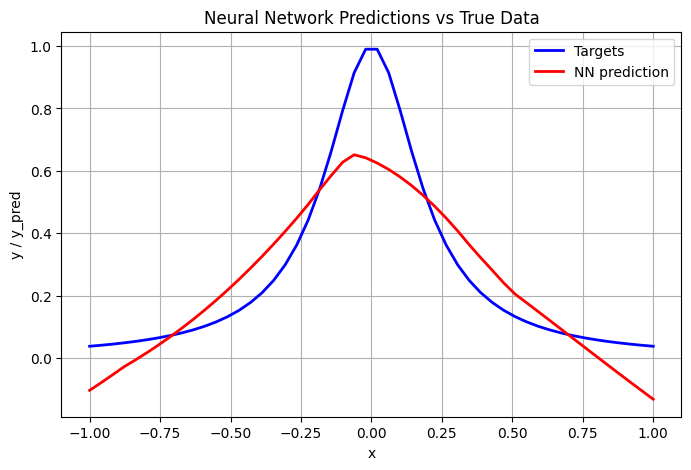

i = 10, j = 30
Validation loss: 0.02496778800088494
Final test loss: 0.03840240747492598
[[0.29100682]
 [0.2362922 ]
 [0.45025658]
 [0.11227803]
 [0.44622311]
 [0.05244122]
 [0.55005225]
 [0.57478389]
 [0.40015957]
 [0.52625843]]


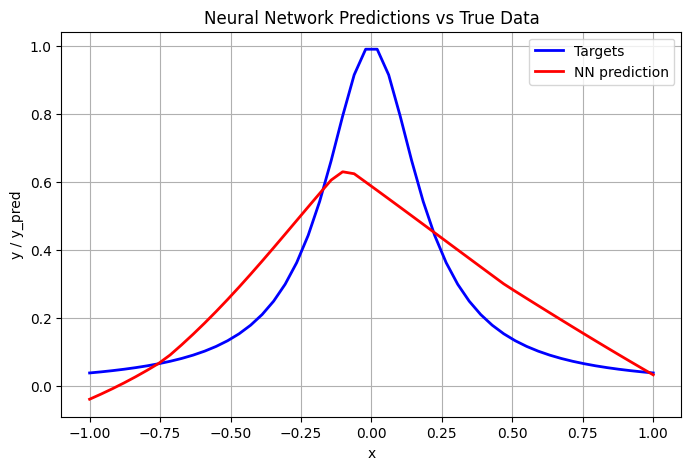

i = 10, j = 40
Validation loss: 0.0192924350089675
Final test loss: 0.023986547707979262
[[ 0.27271605]
 [ 0.08032423]
 [ 0.51112521]
 [-0.03331081]
 [ 0.43776036]
 [ 0.05397947]
 [ 0.64940912]
 [ 0.6558482 ]
 [ 0.37605299]
 [ 0.51963398]]


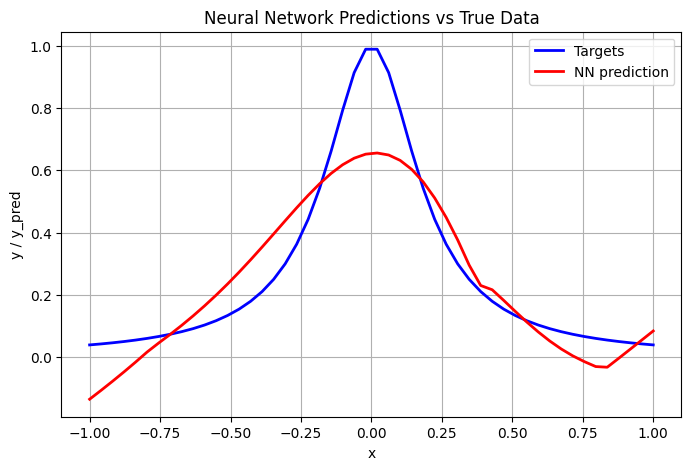

i = 10, j = 50
Validation loss: 0.014154584061822028
Final test loss: 0.018943983722693576
[[0.28838082]
 [0.22992339]
 [0.54049689]
 [0.10338874]
 [0.45268704]
 [0.06110823]
 [0.72557721]
 [0.77487352]
 [0.45853383]
 [0.55152687]]


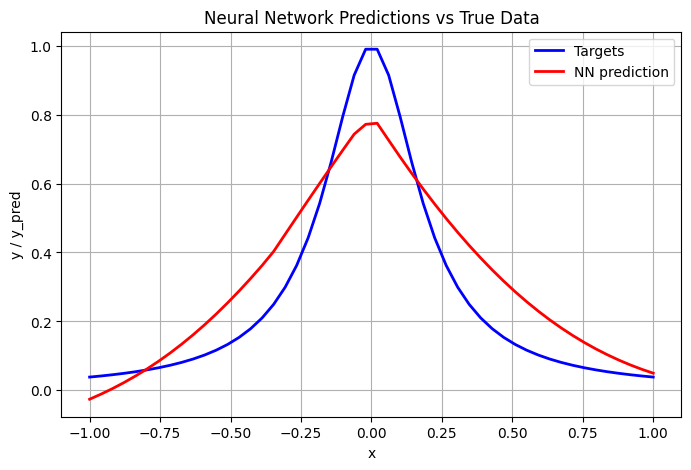

i = 10, j = 60
Validation loss: 0.017297199448917736
Final test loss: 0.028990229868045912
[[0.30044872]
 [0.06406872]
 [0.55420811]
 [0.04532284]
 [0.45957741]
 [0.06656579]
 [0.6429374 ]
 [0.64579837]
 [0.46721286]
 [0.53087017]]


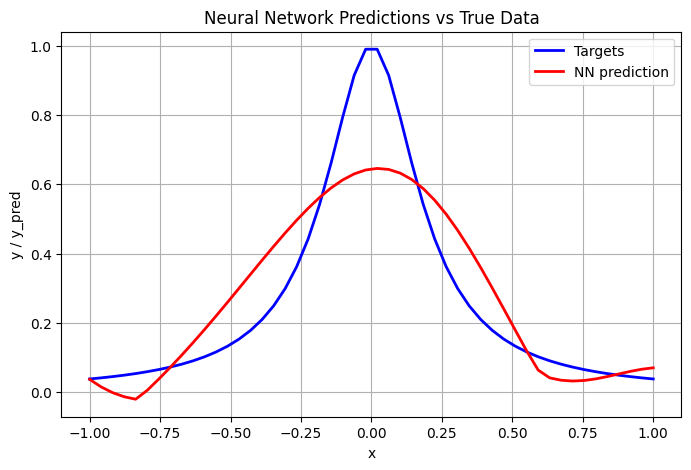

i = 10, j = 70
Validation loss: 0.03870154070036162
Final test loss: 0.0404367680078815
[[0.29166108]
 [0.34124186]
 [0.60006074]
 [0.08891397]
 [0.46592267]
 [0.00673269]
 [0.64579159]
 [0.6525689 ]
 [0.56919328]
 [0.56318138]]


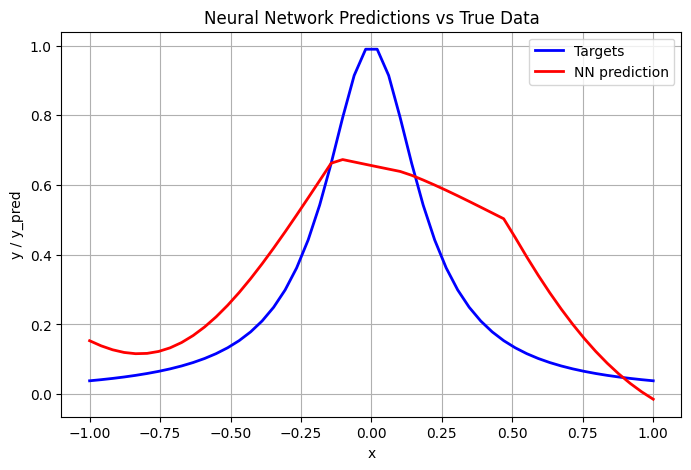

i = 10, j = 80
Validation loss: 0.008348037811469741
Final test loss: 0.016503108202096477
[[0.16141721]
 [0.13622158]
 [0.50438812]
 [0.04658583]
 [0.35157717]
 [0.03738902]
 [0.67881021]
 [0.70722064]
 [0.40496212]
 [0.54608115]]


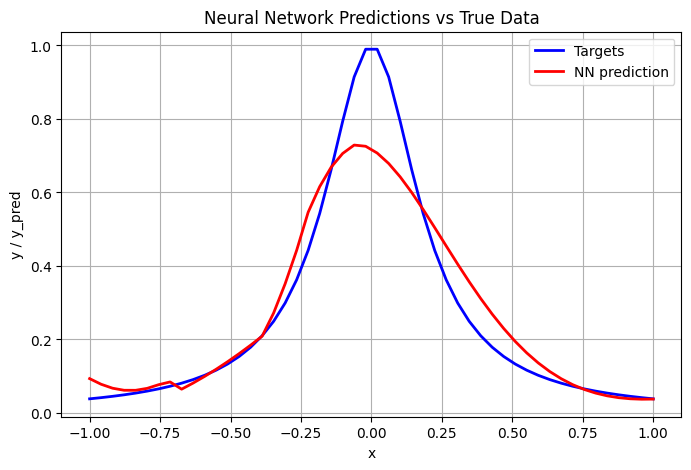

i = 10, j = 90
Validation loss: 0.018425813401192474
Final test loss: 0.023422071714433543
[[ 0.07029033]
 [-0.06406988]
 [ 0.52419571]
 [ 0.00175144]
 [ 0.34419937]
 [ 0.10760038]
 [ 0.65470731]
 [ 0.66201055]
 [ 0.38268531]
 [ 0.48710571]]


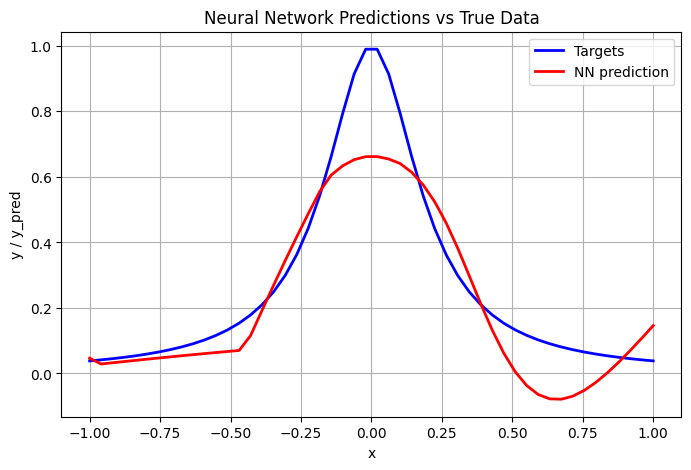

i = 10, j = 100
Validation loss: 0.007505276556230939
Final test loss: 0.009129689892175353
[[0.06915795]
 [0.0490825 ]
 [0.50435745]
 [0.00764847]
 [0.32034052]
 [0.05378996]
 [0.75956713]
 [0.77493707]
 [0.33542344]
 [0.50033616]]


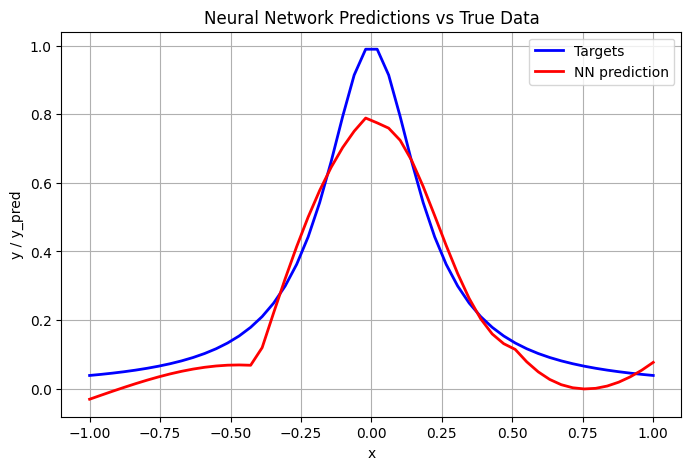

i = 20, j = 10
Validation loss: 0.008667379287629253
Final test loss: 0.016903856397238563
[[ 0.18684849]
 [ 0.2000119 ]
 [ 0.46285964]
 [ 0.06426596]
 [ 0.35827314]
 [-0.04777548]
 [ 0.66715757]
 [ 0.70905391]
 [ 0.35678365]
 [ 0.49945255]]


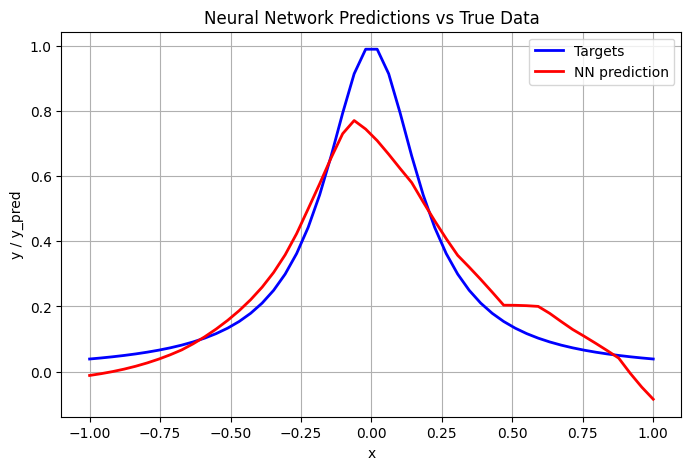

i = 20, j = 20
Validation loss: 0.01378565642434732
Final test loss: 0.021991688887019557
[[0.27904899]
 [0.15661644]
 [0.57033221]
 [0.0592318 ]
 [0.48018312]
 [0.08435702]
 [0.72853396]
 [0.73485045]
 [0.47240211]
 [0.58680419]]


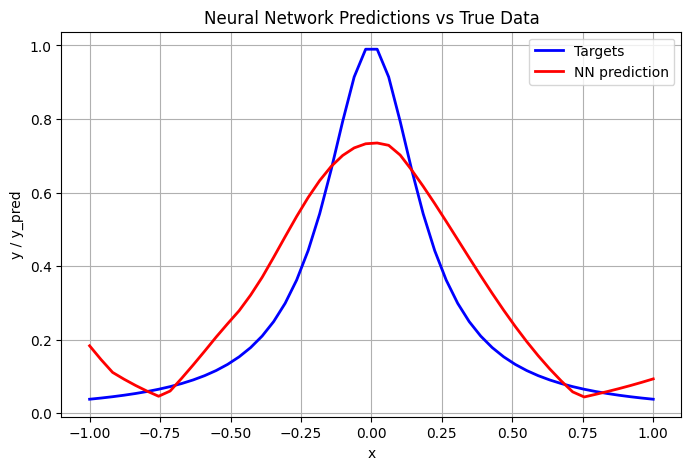

i = 20, j = 30
Validation loss: 0.004249589609222471
Final test loss: 0.007517994835846418
[[0.15687025]
 [0.07747757]
 [0.51364658]
 [0.05161204]
 [0.32930376]
 [0.06885054]
 [0.76692833]
 [0.79641966]
 [0.35414476]
 [0.51815977]]


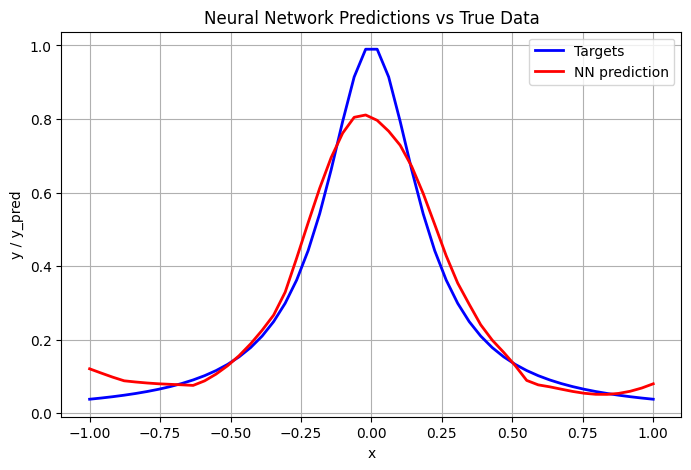

i = 20, j = 40
Validation loss: 0.015722589736366865
Final test loss: 0.03274608940870662
[[ 0.22379032]
 [ 0.13047172]
 [ 0.46578532]
 [-0.02750338]
 [ 0.42144864]
 [-0.0785727 ]
 [ 0.58137977]
 [ 0.60537003]
 [ 0.38944052]
 [ 0.5783208 ]]


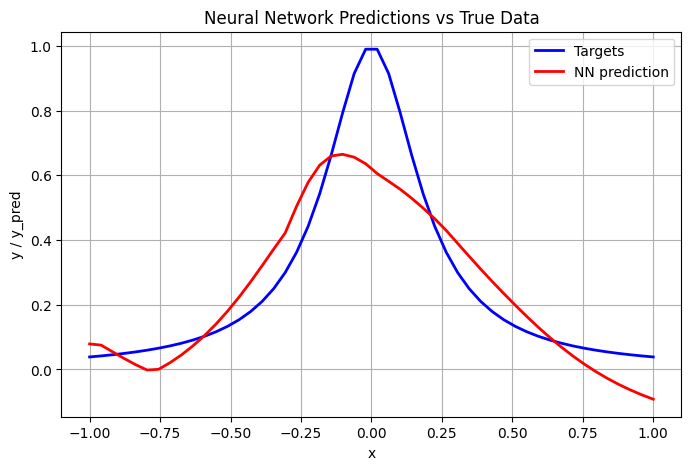

i = 20, j = 50
Validation loss: 0.0060181471854208425
Final test loss: 0.011143847085517041
[[0.12671767]
 [0.07616586]
 [0.49874838]
 [0.0412064 ]
 [0.34486975]
 [0.03045954]
 [0.71709626]
 [0.74552294]
 [0.34306127]
 [0.50598817]]


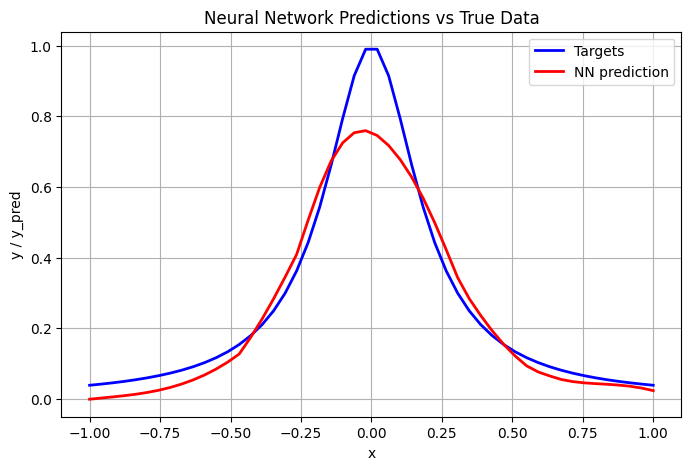

i = 20, j = 60
Validation loss: 0.006525369360525897
Final test loss: 0.014644860058419487
[[0.17914335]
 [0.10749721]
 [0.57931929]
 [0.11047833]
 [0.43203858]
 [0.09849985]
 [0.76429773]
 [0.78162263]
 [0.44677086]
 [0.56655208]]


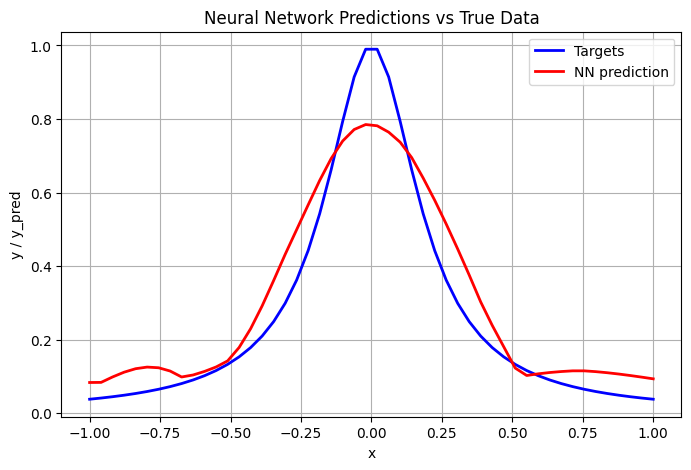

i = 20, j = 70
Validation loss: 0.004390060946532111
Final test loss: 0.0056946391289731425
[[0.10268118]
 [0.04618315]
 [0.46272443]
 [0.01903942]
 [0.31571625]
 [0.02777022]
 [0.76763744]
 [0.82921062]
 [0.32385158]
 [0.47706684]]


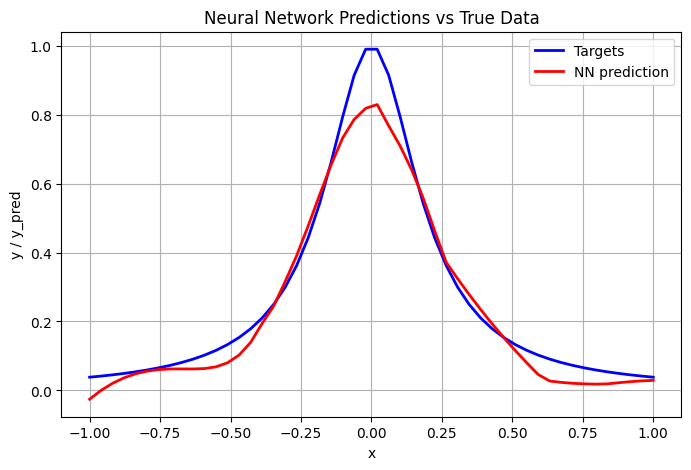

i = 20, j = 80
Validation loss: 0.0022224234391887117
Final test loss: 0.005629575563036879
[[0.19097   ]
 [0.16019623]
 [0.5548923 ]
 [0.08353115]
 [0.37393188]
 [0.05793471]
 [0.83125182]
 [0.88170953]
 [0.38400752]
 [0.52283645]]


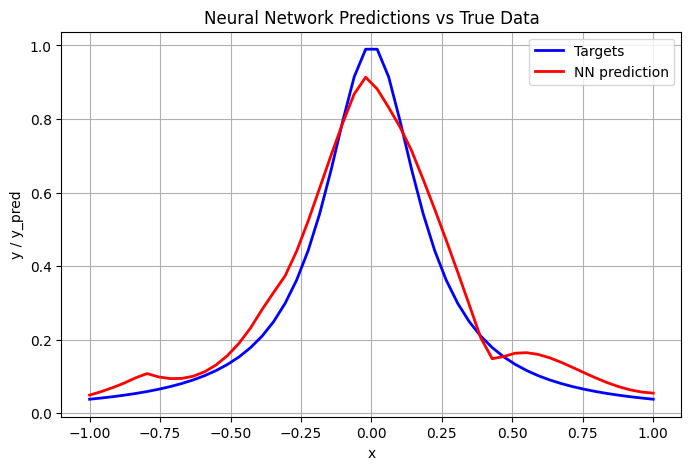

i = 20, j = 90
Validation loss: 0.0037483060357711906
Final test loss: 0.005823814208222412
[[0.17762935]
 [0.1034624 ]
 [0.53232084]
 [0.11205199]
 [0.37041494]
 [0.05195988]
 [0.80800499]
 [0.83459714]
 [0.33335773]
 [0.50971139]]


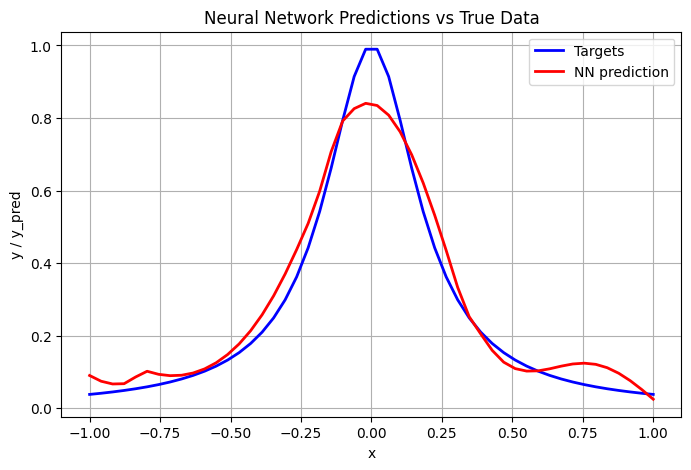

i = 20, j = 100
Validation loss: 0.0056823868584533746
Final test loss: 0.009325409937237416
[[0.19121784]
 [0.14689423]
 [0.59123923]
 [0.09981794]
 [0.41244907]
 [0.08112621]
 [0.83065302]
 [0.84872499]
 [0.38306203]
 [0.57420474]]


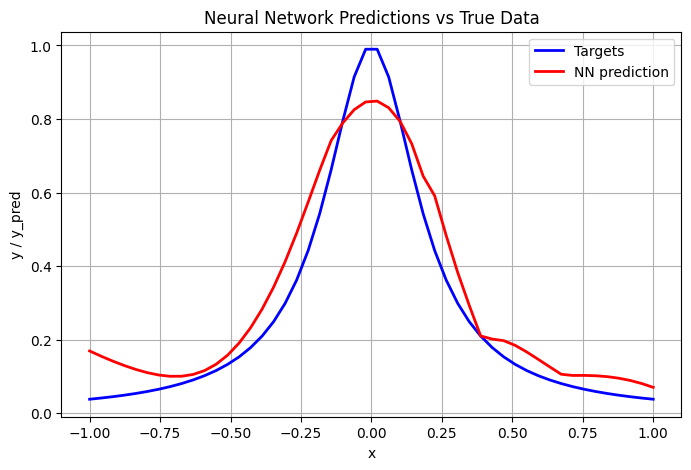

i = 30, j = 10
Validation loss: 0.019223682452004846
Final test loss: 0.031156096761628373
[[0.27432731]
 [0.16171879]
 [0.50461949]
 [0.09142335]
 [0.42626565]
 [0.07169351]
 [0.59648262]
 [0.60289445]
 [0.42225081]
 [0.51590515]]


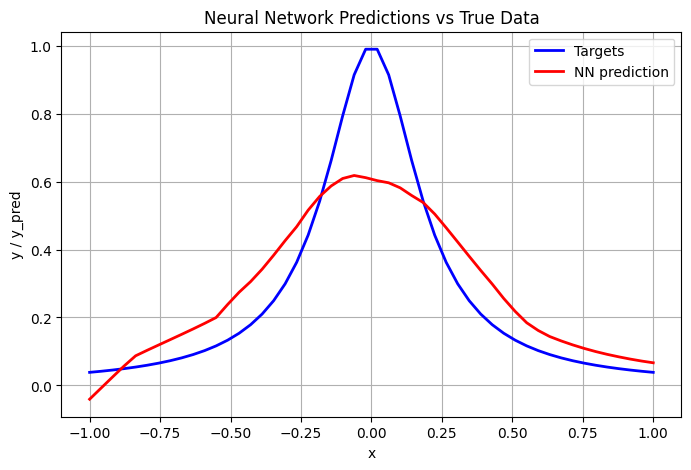

i = 30, j = 20
Validation loss: 0.013220772290311489
Final test loss: 0.022131871847819548
[[ 0.23456277]
 [ 0.15359592]
 [ 0.46122336]
 [ 0.03298237]
 [ 0.4117826 ]
 [-0.03246177]
 [ 0.64021411]
 [ 0.65476001]
 [ 0.34381402]
 [ 0.50476694]]


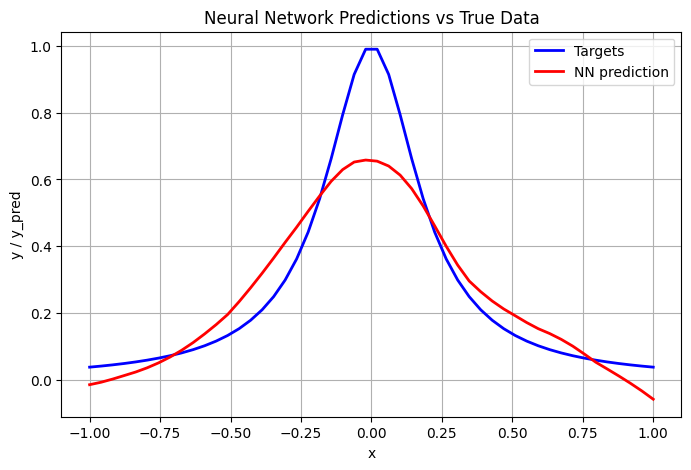

i = 30, j = 30
Validation loss: 0.0075654464659197064
Final test loss: 0.0088535766995847
[[0.1833442 ]
 [0.05863416]
 [0.51974124]
 [0.07847081]
 [0.39480766]
 [0.03407118]
 [0.78913586]
 [0.76770216]
 [0.31683432]
 [0.51102694]]


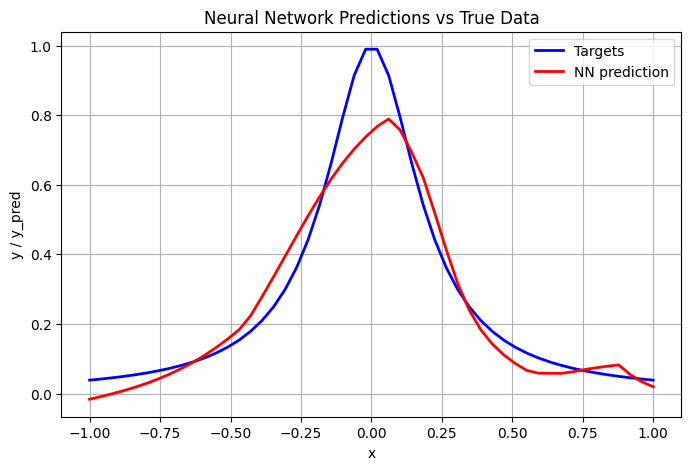

i = 30, j = 40
Validation loss: 0.017589801210242638
Final test loss: 0.019447388448801693
[[ 1.50580850e-01]
 [ 2.04560907e-04]
 [ 5.29665190e-01]
 [-6.77736834e-03]
 [ 3.48817225e-01]
 [ 1.34068353e-02]
 [ 6.65468603e-01]
 [ 6.63525127e-01]
 [ 3.20052881e-01]
 [ 4.68754795e-01]]


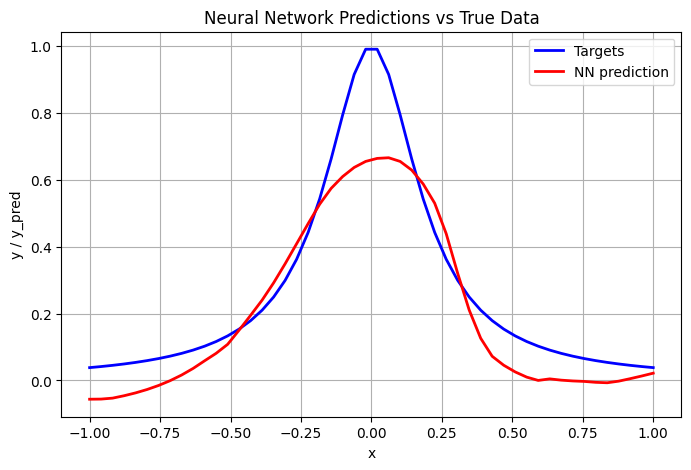

i = 30, j = 50
Validation loss: 0.0014624803612339414
Final test loss: 0.0018322524945199304
[[ 0.12506996]
 [ 0.13585202]
 [ 0.49242291]
 [ 0.07771718]
 [ 0.28537611]
 [-0.00667083]
 [ 0.82264072]
 [ 0.943105  ]
 [ 0.3138396 ]
 [ 0.4377462 ]]


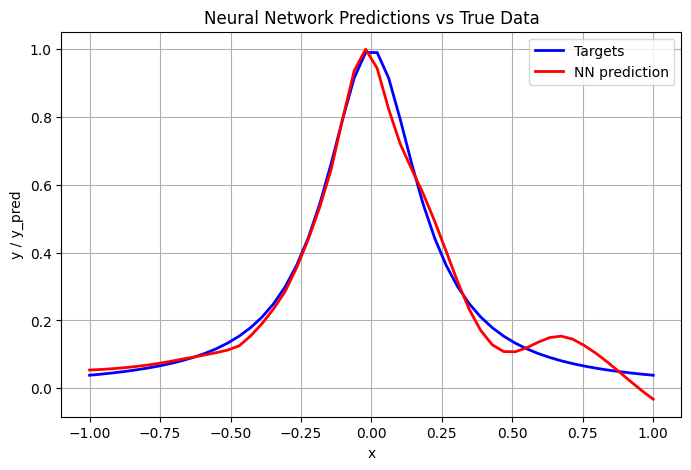

i = 30, j = 60
Validation loss: 0.007462196087984013
Final test loss: 0.010505987702923495
[[1.46782940e-01]
 [1.25439351e-01]
 [5.00065811e-01]
 [5.21277542e-04]
 [3.65125759e-01]
 [3.31166517e-02]
 [7.34361865e-01]
 [7.50115450e-01]
 [3.21403321e-01]
 [5.02533467e-01]]


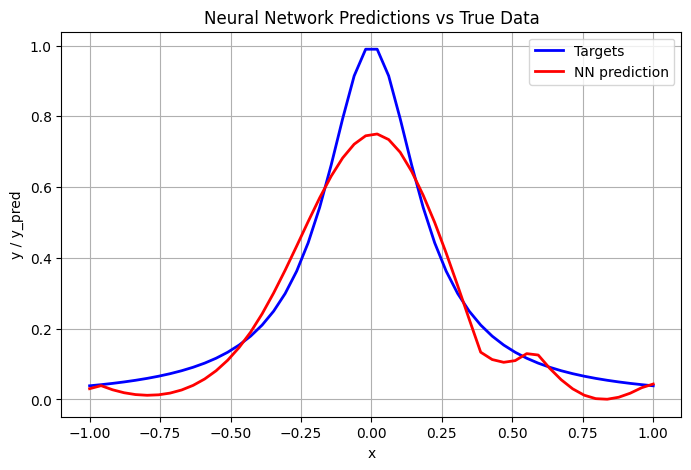

i = 30, j = 70
Validation loss: 0.004581152918960729
Final test loss: 0.0084267152105234
[[0.08829206]
 [0.1039674 ]
 [0.49469255]
 [0.03833895]
 [0.38046107]
 [0.04142978]
 [0.77671132]
 [0.79562196]
 [0.2985486 ]
 [0.56001694]]


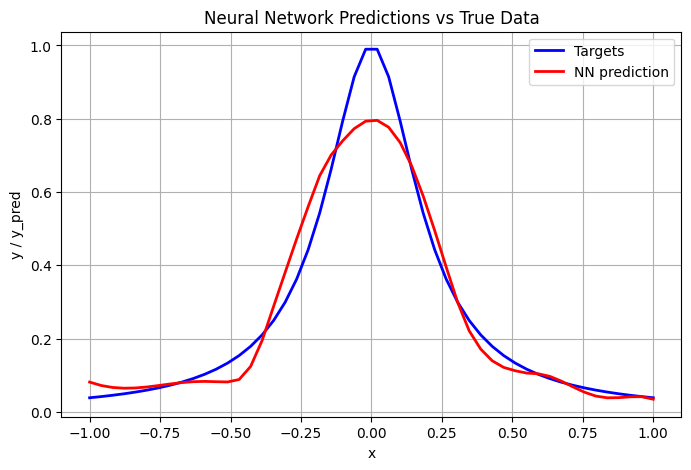

i = 30, j = 80
Validation loss: 0.0039187199953022575
Final test loss: 0.005922462467827816
[[0.13866575]
 [0.0568279 ]
 [0.5040079 ]
 [0.07211021]
 [0.25357145]
 [0.01972465]
 [0.78273392]
 [0.80953027]
 [0.32055333]
 [0.43873444]]


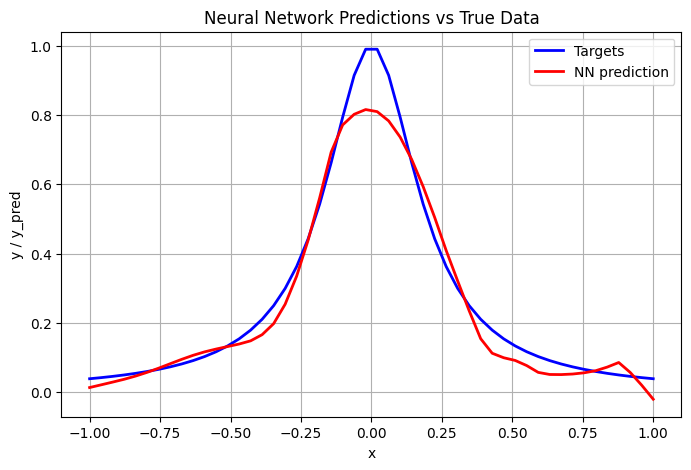

i = 30, j = 90
Validation loss: 0.006943075926070577
Final test loss: 0.010270247748516535
[[ 0.15330432]
 [ 0.12403007]
 [ 0.51010239]
 [-0.06443276]
 [ 0.34054392]
 [ 0.0655818 ]
 [ 0.75503789]
 [ 0.77456373]
 [ 0.36866075]
 [ 0.51223447]]


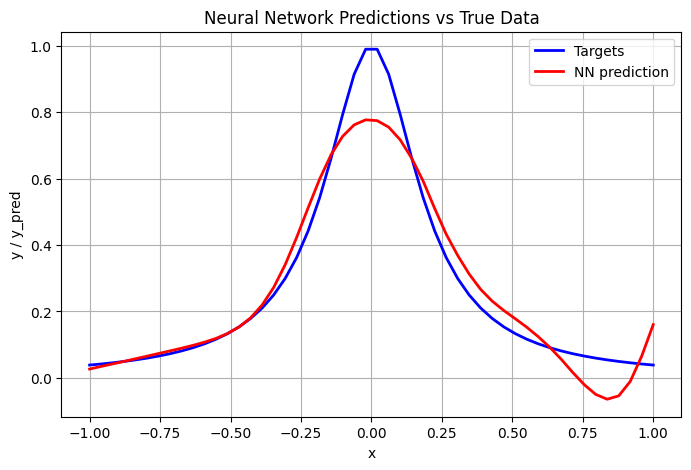

i = 30, j = 100
Validation loss: 0.003941181643199537
Final test loss: 0.010465029535158637
[[0.13694112]
 [0.09718703]
 [0.54564086]
 [0.07599926]
 [0.38239866]
 [0.10770813]
 [0.76087782]
 [0.79095876]
 [0.39680403]
 [0.53922137]]


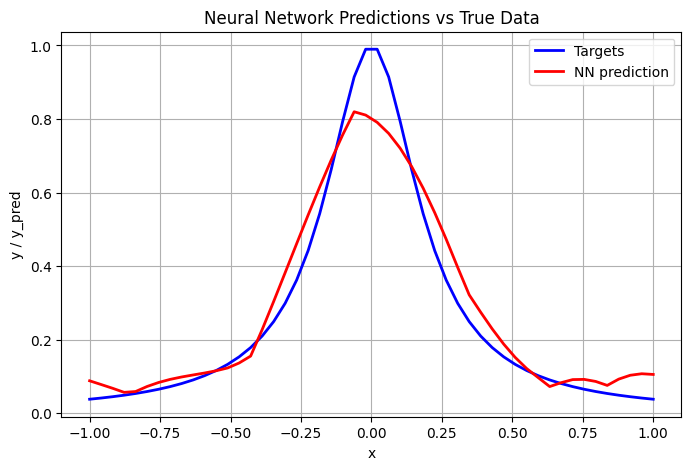

i = 40, j = 10
Validation loss: 0.006720763100621062
Final test loss: 0.012127354081897097
[[0.13252588]
 [0.05879409]
 [0.50565344]
 [0.02310872]
 [0.27739314]
 [0.05115098]
 [0.71976679]
 [0.73892718]
 [0.37992748]
 [0.52091596]]


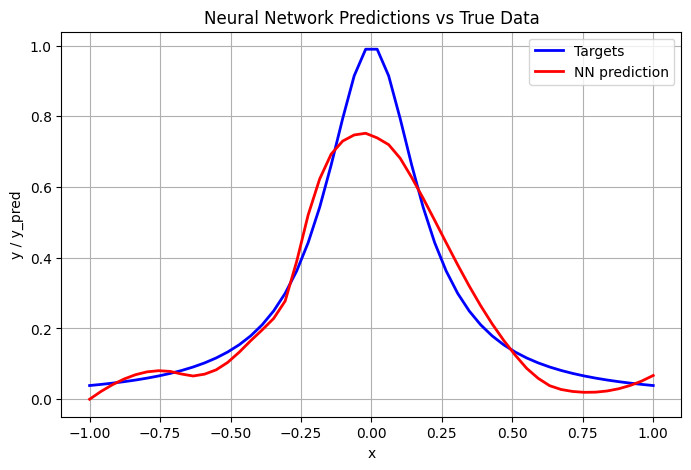

i = 40, j = 20
Validation loss: 0.028208171306613784
Final test loss: 0.04093223824781509
[[0.26730151]
 [0.18465566]
 [0.48781752]
 [0.06234908]
 [0.40485478]
 [0.02706045]
 [0.53459378]
 [0.52464005]
 [0.42395141]
 [0.45276938]]


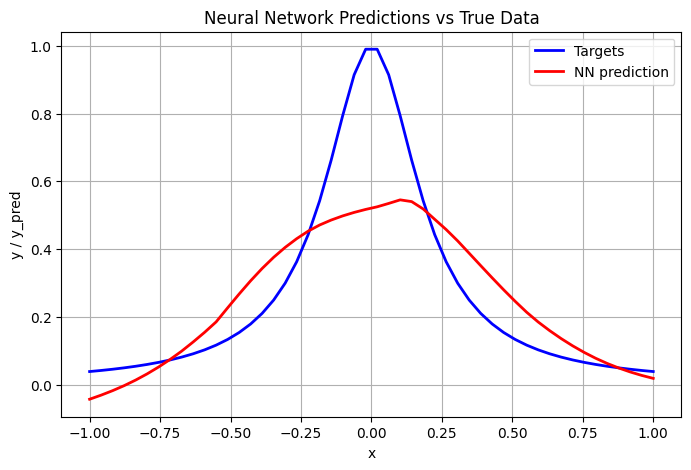

i = 40, j = 30
Validation loss: 0.0024242005208370654
Final test loss: 0.005054778833471089
[[0.10743704]
 [0.11391591]
 [0.50299691]
 [0.02842011]
 [0.27744495]
 [0.07571637]
 [0.79356336]
 [0.84724368]
 [0.3683516 ]
 [0.49418405]]


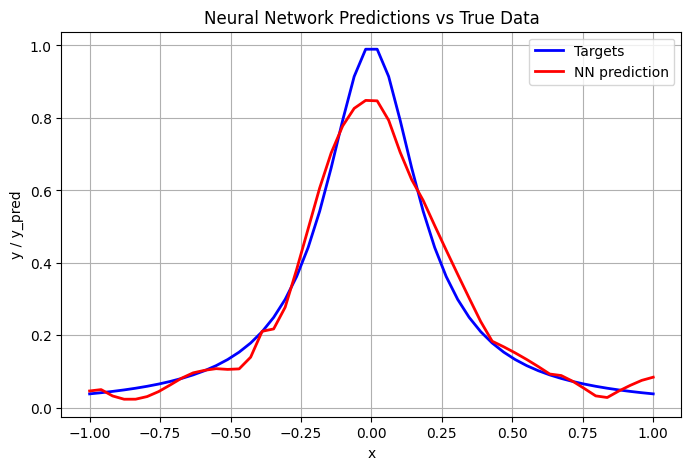

i = 40, j = 40
Validation loss: 0.007664010271006544
Final test loss: 0.013443300504872805
[[0.24636479]
 [0.10175883]
 [0.51089052]
 [0.04757252]
 [0.44767484]
 [0.06853928]
 [0.75185075]
 [0.75848283]
 [0.37530438]
 [0.55511812]]


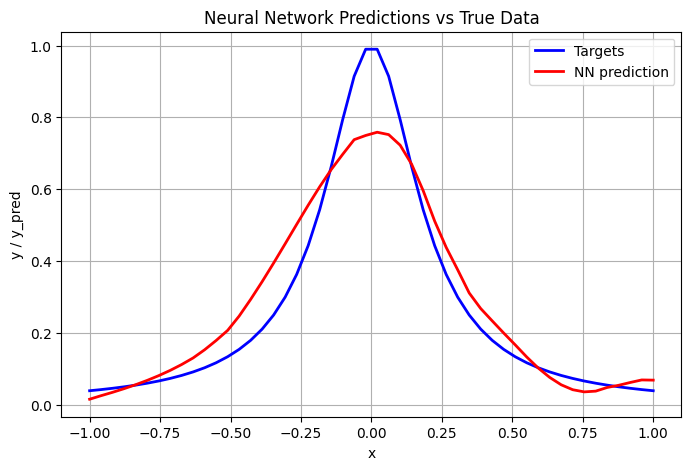

i = 40, j = 50
Validation loss: 0.001450521877203869
Final test loss: 0.002596867191018898
[[0.13013197]
 [0.11933175]
 [0.47744106]
 [0.03168121]
 [0.28255213]
 [0.01043483]
 [0.82165929]
 [0.8740601 ]
 [0.30522847]
 [0.42962289]]


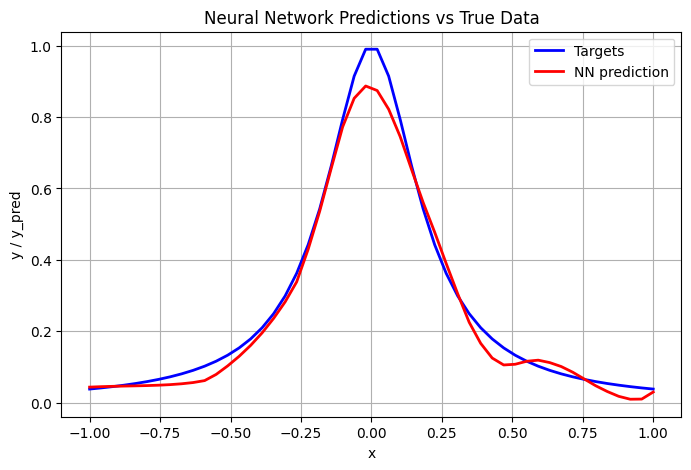

i = 40, j = 60
Validation loss: 0.002559075972602931
Final test loss: 0.006154550327574665
[[0.14727898]
 [0.08856464]
 [0.50305587]
 [0.09052958]
 [0.27734227]
 [0.05602386]
 [0.77800261]
 [0.82116289]
 [0.36955781]
 [0.50323476]]


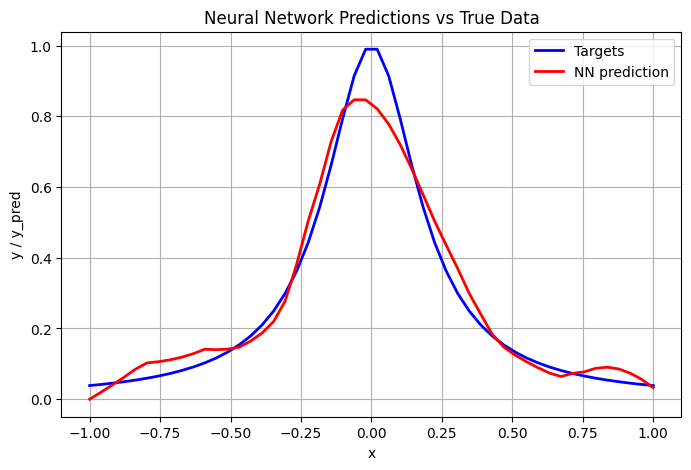

i = 40, j = 70
Validation loss: 0.0028264937935085573
Final test loss: 0.003419510723436701
[[0.11971887]
 [0.10224986]
 [0.470942  ]
 [0.0610999 ]
 [0.2972788 ]
 [0.03757021]
 [0.82759259]
 [0.83371192]
 [0.31544055]
 [0.44935675]]


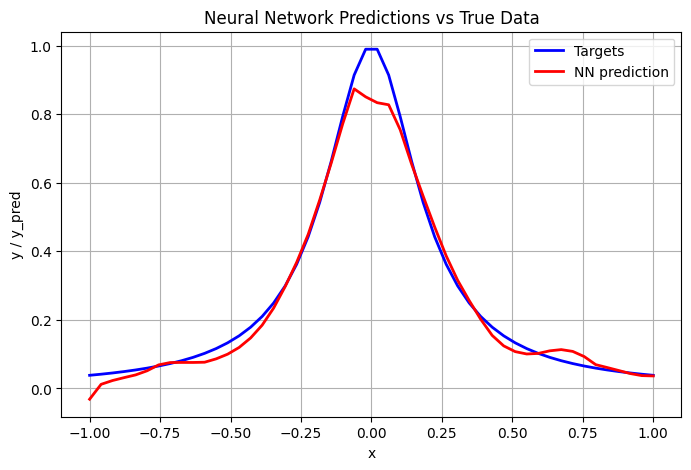

i = 40, j = 80
Validation loss: 0.007930277800314004
Final test loss: 0.011775992691409016
[[ 0.04845256]
 [ 0.01916677]
 [ 0.44301166]
 [-0.08436   ]
 [ 0.26235557]
 [-0.03814295]
 [ 0.72969385]
 [ 0.81557109]
 [ 0.22887828]
 [ 0.38311982]]


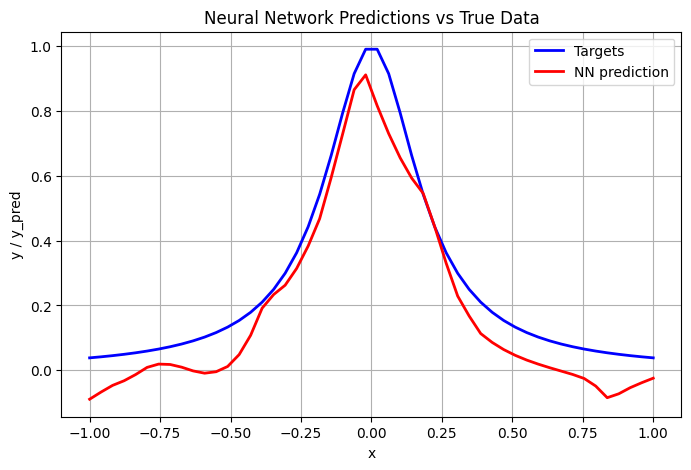

i = 40, j = 90
Validation loss: 0.0008526444748297824
Final test loss: 0.0012582704683973371
[[0.10994505]
 [0.06348123]
 [0.42544585]
 [0.04503595]
 [0.31410198]
 [0.02229576]
 [0.85937075]
 [0.91937942]
 [0.29467751]
 [0.45650373]]


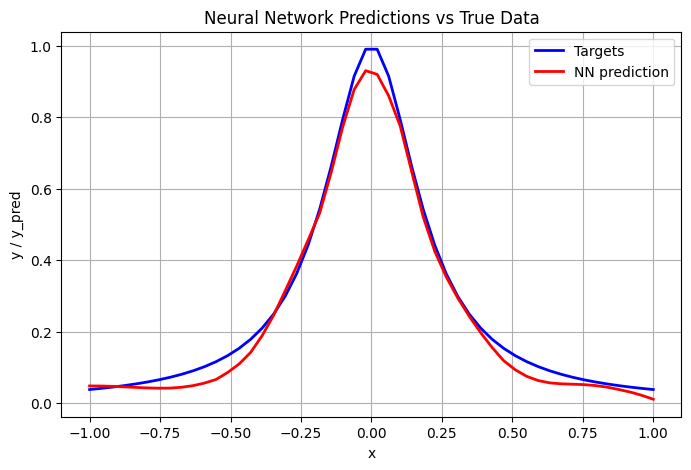

i = 40, j = 100
Validation loss: 0.0010957887531207393
Final test loss: 0.0009684954810677386
[[ 0.19051035]
 [ 0.13537297]
 [ 0.44881223]
 [-0.00281286]
 [ 0.27472354]
 [ 0.07061579]
 [ 0.89333075]
 [ 0.9729668 ]
 [ 0.30957324]
 [ 0.40115904]]


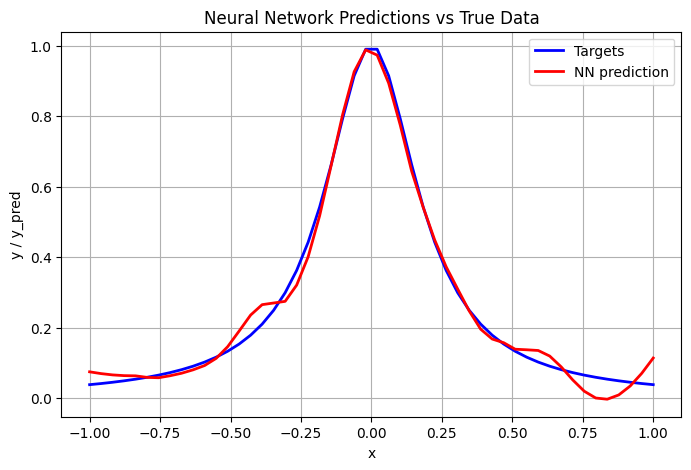

i = 50, j = 10
Validation loss: 0.012372785036299643
Final test loss: 0.023204475916235326
[[0.26874329]
 [0.06001779]
 [0.53912258]
 [0.08337939]
 [0.44520544]
 [0.12634871]
 [0.6791857 ]
 [0.68318817]
 [0.43314993]
 [0.54788785]]


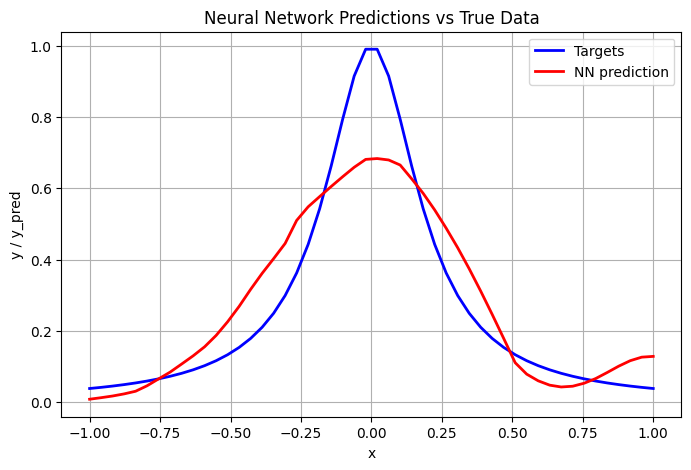

i = 50, j = 20
Validation loss: 0.002116296002008089
Final test loss: 0.004049982692294186
[[0.1440122 ]
 [0.10511863]
 [0.48461036]
 [0.06499288]
 [0.33885896]
 [0.03933393]
 [0.81030013]
 [0.84118681]
 [0.30435626]
 [0.50592769]]


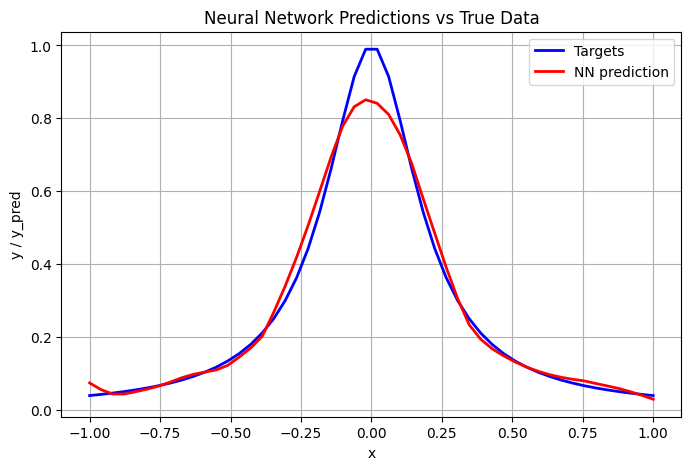

i = 50, j = 30
Validation loss: 0.0030960500445257125
Final test loss: 0.005321849552811167
[[0.1477008 ]
 [0.03492291]
 [0.48589233]
 [0.03221181]
 [0.28647953]
 [0.06267147]
 [0.78573106]
 [0.83446903]
 [0.36755357]
 [0.46113652]]


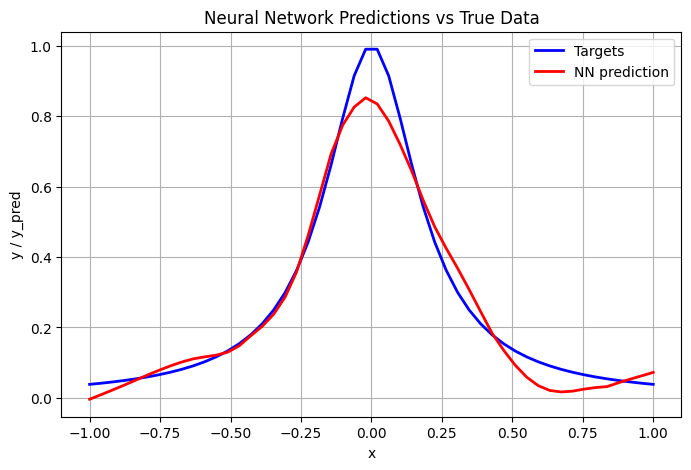

i = 50, j = 40
Validation loss: 0.0015173371999747244
Final test loss: 0.0008400437401285819
[[0.13982256]
 [0.165908  ]
 [0.42633404]
 [0.04658168]
 [0.30442214]
 [0.02344471]
 [0.94383739]
 [1.0202897 ]
 [0.25789914]
 [0.44122548]]


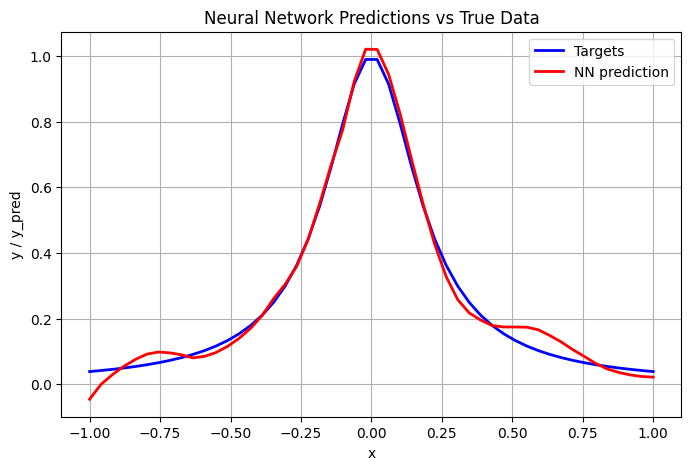

i = 50, j = 50
Validation loss: 0.005197925305855502
Final test loss: 0.004340077069312503
[[0.13239535]
 [0.02875825]
 [0.45990767]
 [0.05002831]
 [0.33426105]
 [0.02537676]
 [0.80589675]
 [0.83732645]
 [0.30130625]
 [0.46931099]]


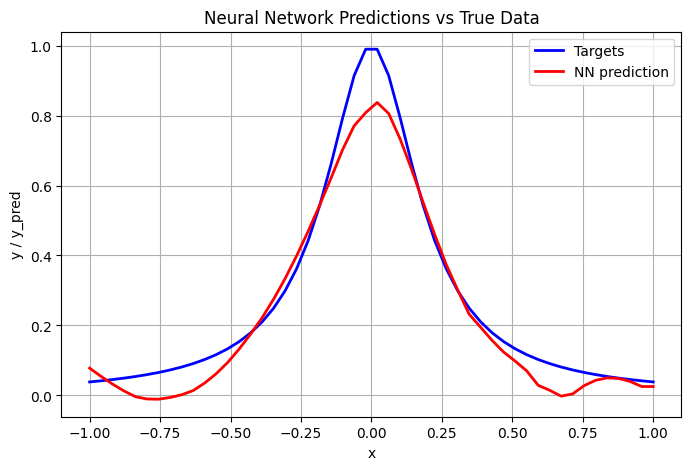

i = 50, j = 60
Validation loss: 0.00026906777544464253
Final test loss: 0.000639408818248354
[[0.18549214]
 [0.09347768]
 [0.48991543]
 [0.0691068 ]
 [0.29596631]
 [0.06237089]
 [0.89280145]
 [0.98400457]
 [0.34148008]
 [0.43259217]]


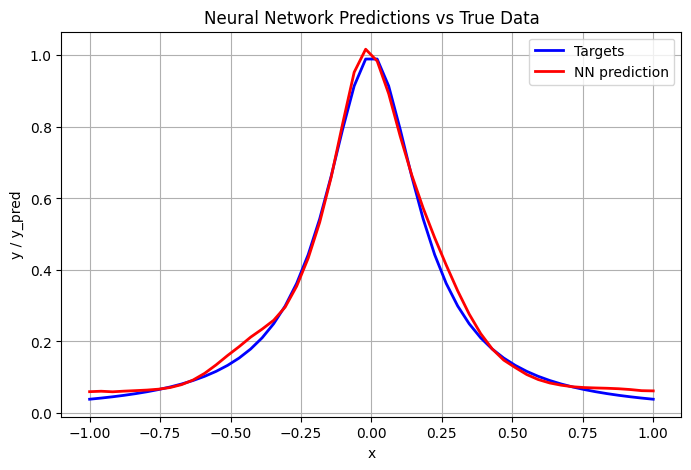

i = 50, j = 70
Validation loss: 0.003774294795531703
Final test loss: 0.004570092710202794
[[0.18929631]
 [0.10558702]
 [0.48880305]
 [0.0630075 ]
 [0.24465266]
 [0.0301013 ]
 [0.78617352]
 [0.84207239]
 [0.32342644]
 [0.45952511]]


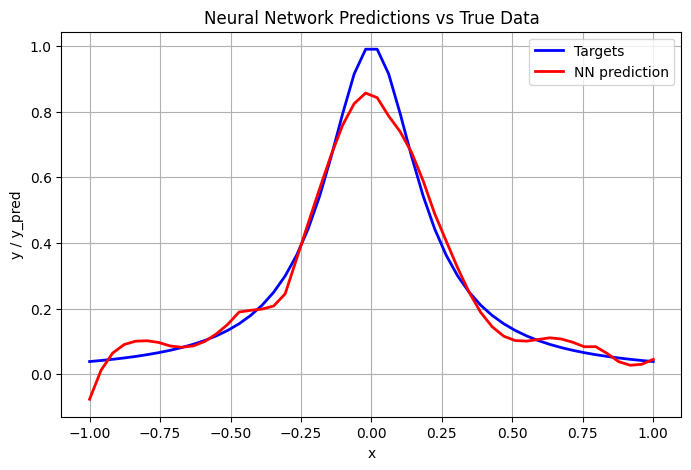

i = 50, j = 80
Validation loss: 0.0035350839614213454
Final test loss: 0.004069277847437025
[[0.13680754]
 [0.11373328]
 [0.51510135]
 [0.06680094]
 [0.35163955]
 [0.07010717]
 [0.84020094]
 [0.87710955]
 [0.35460627]
 [0.54270413]]


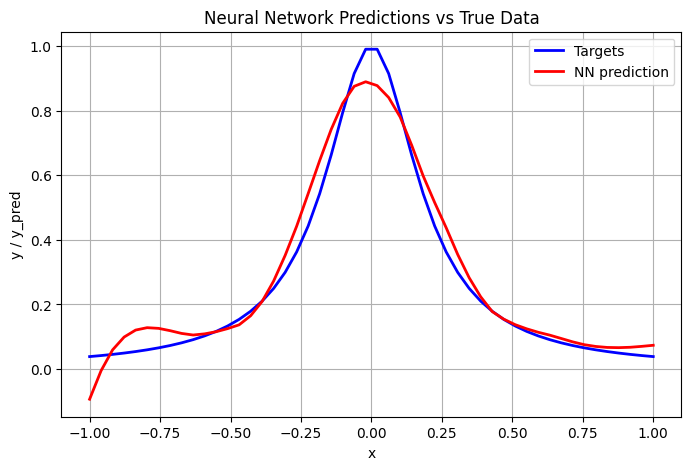

i = 50, j = 90
Validation loss: 0.0009345939072838788
Final test loss: 0.000416456682333731
[[0.16750197]
 [0.13447558]
 [0.45520725]
 [0.01817168]
 [0.30842889]
 [0.06620025]
 [0.9142173 ]
 [1.00297982]
 [0.31614767]
 [0.42383921]]


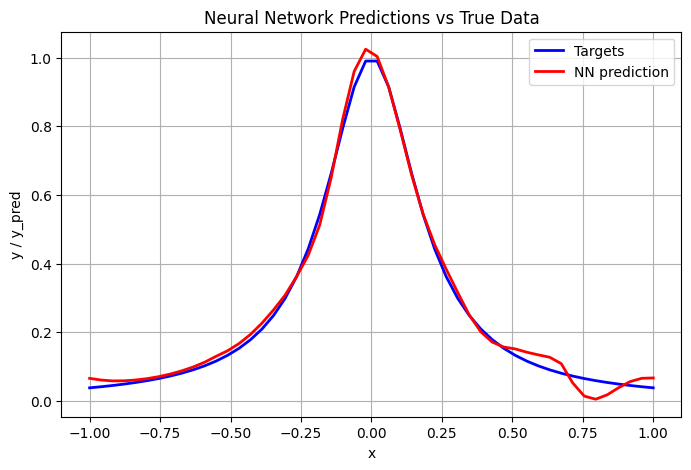

i = 50, j = 100
Validation loss: 0.0010981400060201749
Final test loss: 0.0011965437603788935
[[0.21782492]
 [0.11929425]
 [0.44125512]
 [0.01871803]
 [0.29969476]
 [0.02931058]
 [0.88107451]
 [0.92831594]
 [0.27480638]
 [0.4689096 ]]


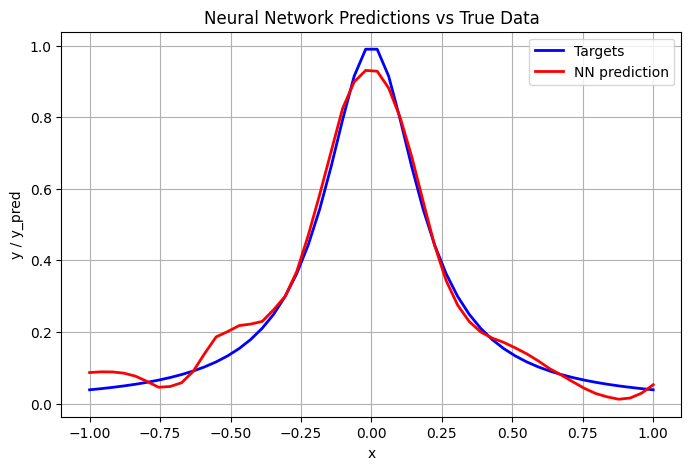

i = 60, j = 10
Validation loss: 0.008866483430028849
Final test loss: 0.015755829649870053
[[0.13858112]
 [0.09005391]
 [0.4376431 ]
 [0.04909405]
 [0.35641822]
 [0.007016  ]
 [0.67227876]
 [0.69371865]
 [0.32458102]
 [0.51876591]]


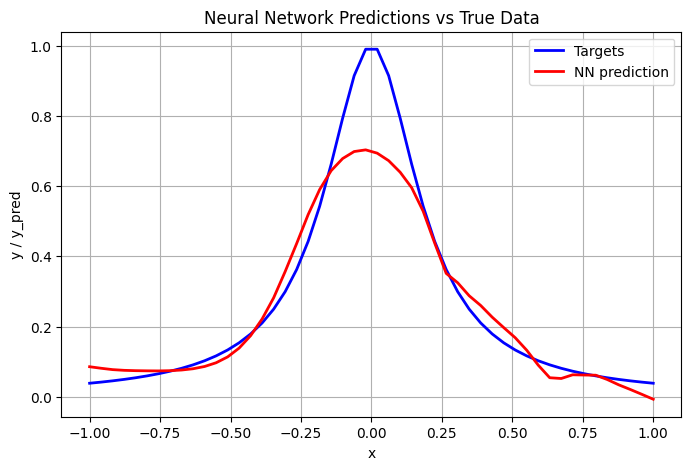

i = 60, j = 20
Validation loss: 0.0019897877303580247
Final test loss: 0.0023456987162375205
[[0.14267514]
 [0.14892744]
 [0.43722745]
 [0.0648314 ]
 [0.21303361]
 [0.02892796]
 [0.86872121]
 [0.89935758]
 [0.26822151]
 [0.39495208]]


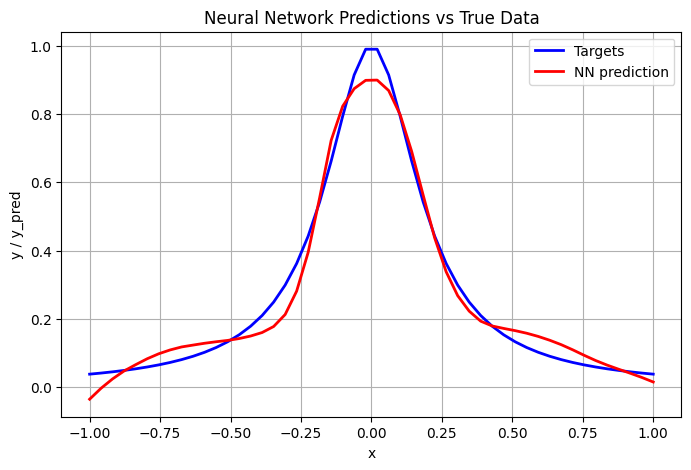

i = 60, j = 30
Validation loss: 0.0013271399952982804
Final test loss: 0.0030006602422123128
[[0.14898523]
 [0.07962547]
 [0.46273768]
 [0.07589861]
 [0.32276315]
 [0.01736734]
 [0.7875622 ]
 [0.88541078]
 [0.30356783]
 [0.46406413]]


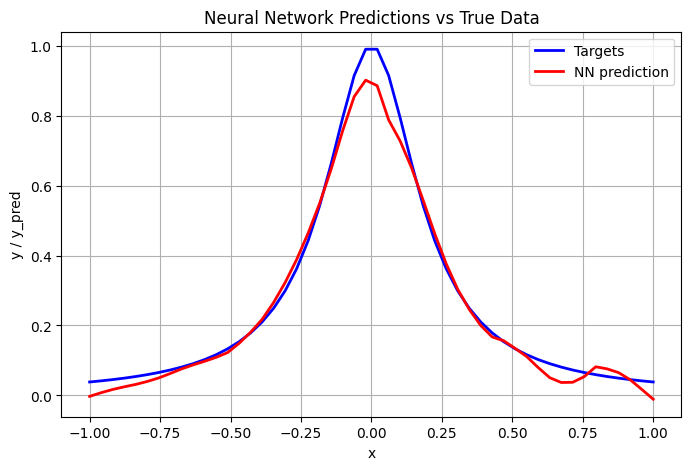

i = 60, j = 40
Validation loss: 0.005228010857889336
Final test loss: 0.00625071310626338
[[0.13291905]
 [0.1458295 ]
 [0.526216  ]
 [0.01317283]
 [0.33181648]
 [0.06554295]
 [0.79752685]
 [0.82280293]
 [0.35181555]
 [0.51744196]]


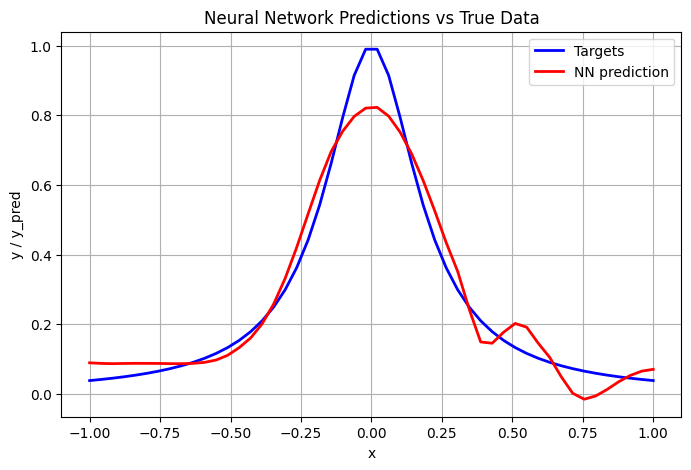

i = 60, j = 50
Validation loss: 0.000643726346619249
Final test loss: 0.0006181042791752664
[[0.13636479]
 [0.12488901]
 [0.4412511 ]
 [0.03614069]
 [0.25211071]
 [0.04263783]
 [0.88874642]
 [0.94494445]
 [0.3061774 ]
 [0.43072458]]


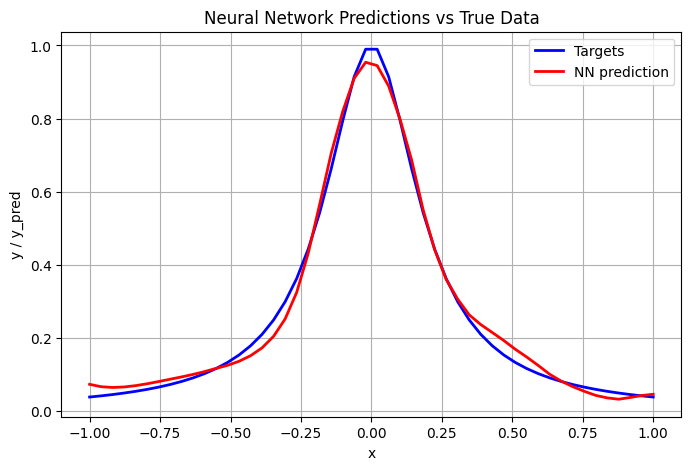

i = 60, j = 60
Validation loss: 0.0020784950457244985
Final test loss: 0.006227454120436588
[[0.21312491]
 [0.11008117]
 [0.53295439]
 [0.03962119]
 [0.37932856]
 [0.06420712]
 [0.79145046]
 [0.85573632]
 [0.39920494]
 [0.42512647]]


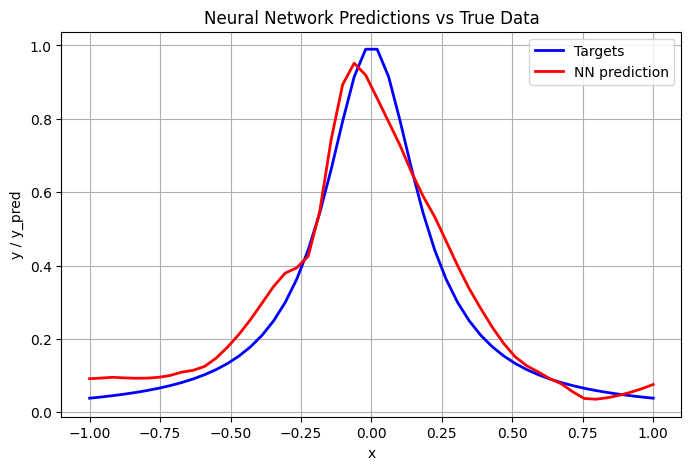

i = 60, j = 70
Validation loss: 0.007655983370915706
Final test loss: 0.01890350527550253
[[0.21122921]
 [0.16856322]
 [0.62864453]
 [0.13659217]
 [0.49048306]
 [0.0945595 ]
 [0.78814422]
 [0.8061706 ]
 [0.43872878]
 [0.61970812]]


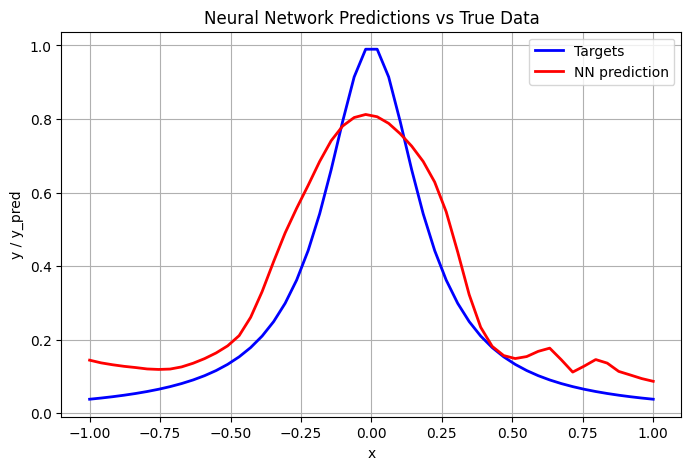

i = 60, j = 80
Validation loss: 0.0013649589853567613
Final test loss: 0.002887740873994044
[[0.15605919]
 [0.06991046]
 [0.46339333]
 [0.05393159]
 [0.28019912]
 [0.05059699]
 [0.81395408]
 [0.86385888]
 [0.3085806 ]
 [0.41187534]]


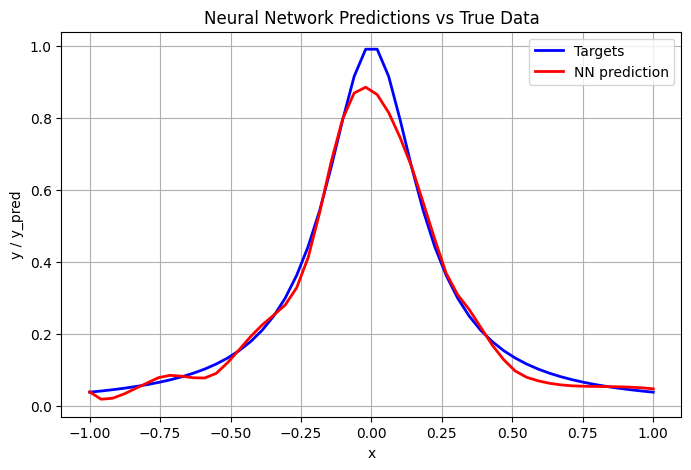

i = 60, j = 90
Validation loss: 0.002160856687155188
Final test loss: 0.0017447897393498165
[[0.17848525]
 [0.01772841]
 [0.46196975]
 [0.10431143]
 [0.28494121]
 [0.05582697]
 [0.87026469]
 [0.92651197]
 [0.27933076]
 [0.44599276]]


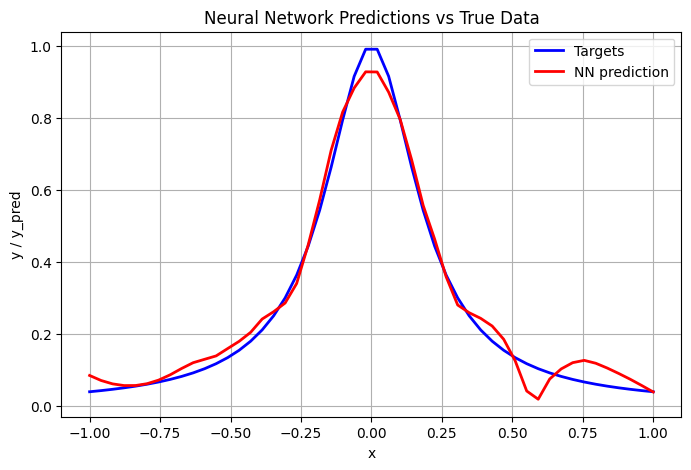

i = 60, j = 100
Validation loss: 0.0005692024258499639
Final test loss: 0.001248628047296389
[[0.14505016]
 [0.09396512]
 [0.50610847]
 [0.05040306]
 [0.31018487]
 [0.05186311]
 [0.86078728]
 [0.91940233]
 [0.2834551 ]
 [0.44133374]]


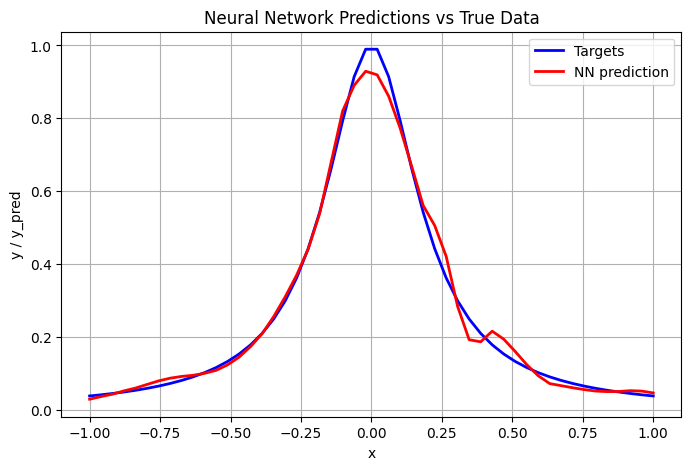

i = 70, j = 10
Validation loss: 0.005926293932038841
Final test loss: 0.010033222764091026
[[0.1224074 ]
 [0.10143346]
 [0.51650336]
 [0.08959582]
 [0.31985121]
 [0.08748626]
 [0.74415971]
 [0.75799949]
 [0.31881964]
 [0.52653899]]


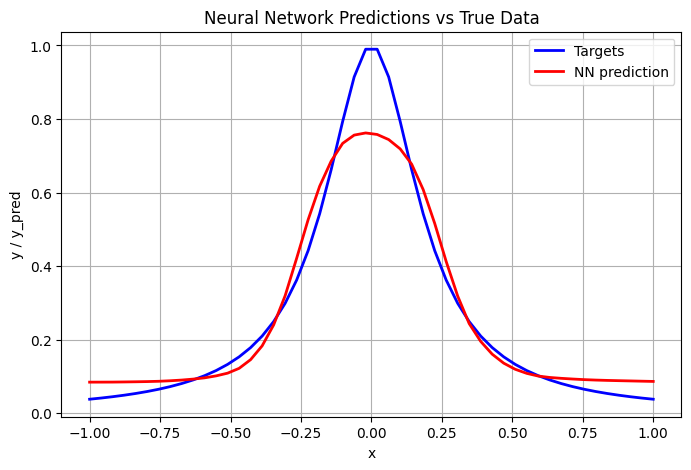

i = 70, j = 20
Validation loss: 0.003052726119832379
Final test loss: 0.005439129198006306
[[0.20114073]
 [0.08285063]
 [0.47810976]
 [0.04528228]
 [0.2550619 ]
 [0.03995362]
 [0.77901109]
 [0.81804266]
 [0.31732833]
 [0.46136005]]


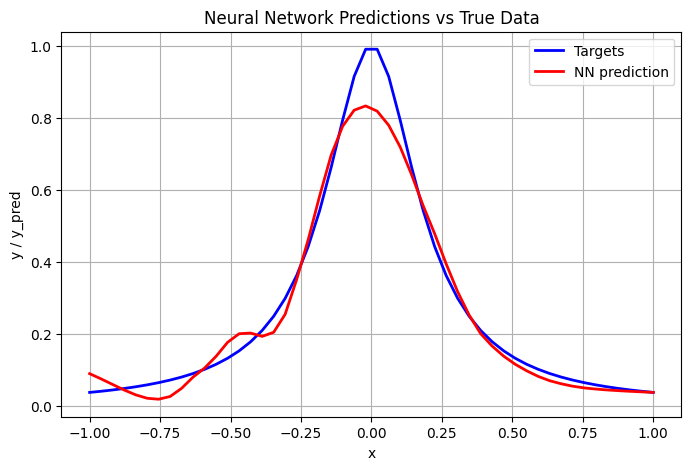

i = 70, j = 30
Validation loss: 0.003132563697615423
Final test loss: 0.003331964498598387
[[0.16715315]
 [0.04204703]
 [0.44911073]
 [0.05699369]
 [0.33657637]
 [0.01810498]
 [0.84089916]
 [0.84743226]
 [0.2603081 ]
 [0.46087643]]


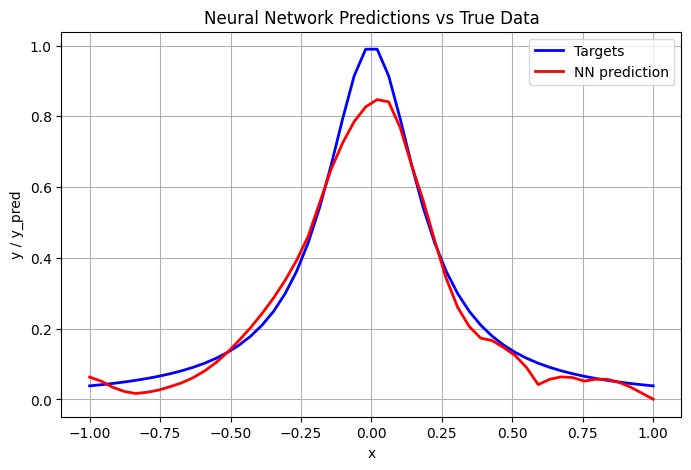

i = 70, j = 40
Validation loss: 0.0014881533431595493
Final test loss: 0.00198287789088229
[[0.15998181]
 [0.10137564]
 [0.43938491]
 [0.05858864]
 [0.37486088]
 [0.04718797]
 [0.87621166]
 [0.90379943]
 [0.26321459]
 [0.50473421]]


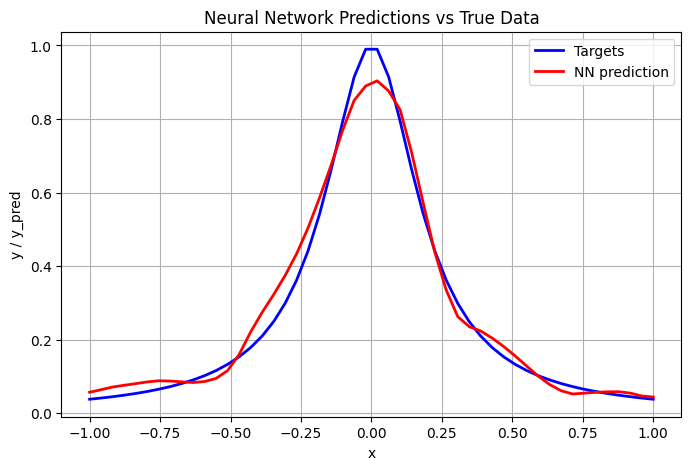

i = 70, j = 50
Validation loss: 0.0014428586846351292
Final test loss: 0.0008449173925889587
[[0.11639032]
 [0.07165289]
 [0.47526475]
 [0.04947207]
 [0.29596518]
 [0.02388839]
 [0.89135141]
 [0.92609386]
 [0.30257855]
 [0.45272042]]


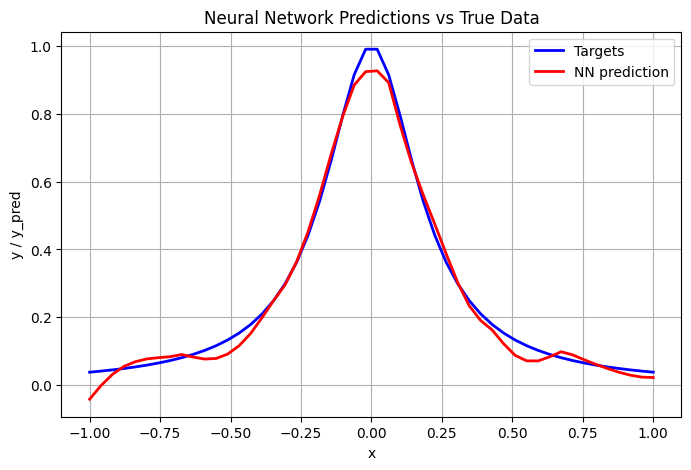

i = 70, j = 60
Validation loss: 0.0013179023948789584
Final test loss: 0.002473805490844105
[[0.2136433 ]
 [0.12802509]
 [0.48869356]
 [0.06716285]
 [0.29717414]
 [0.05270422]
 [0.83904989]
 [0.88423025]
 [0.32619143]
 [0.46566034]]


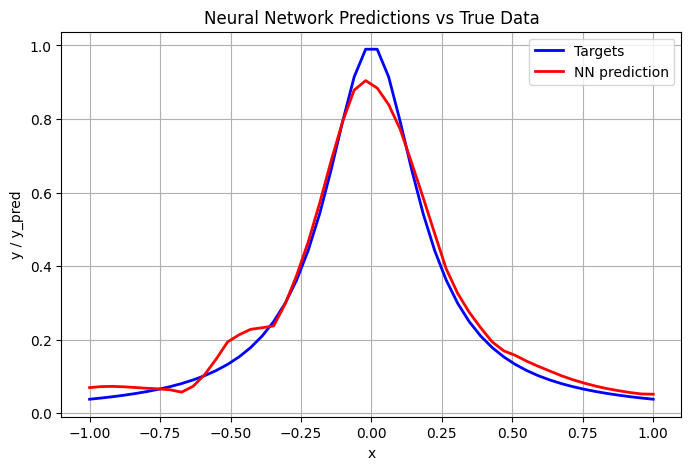

i = 70, j = 70
Validation loss: 0.005392211758121601
Final test loss: 0.005738373103206004
[[0.04677532]
 [0.06894472]
 [0.45131896]
 [0.04841511]
 [0.34179328]
 [0.02433433]
 [0.80288635]
 [0.82410759]
 [0.26458775]
 [0.48219904]]


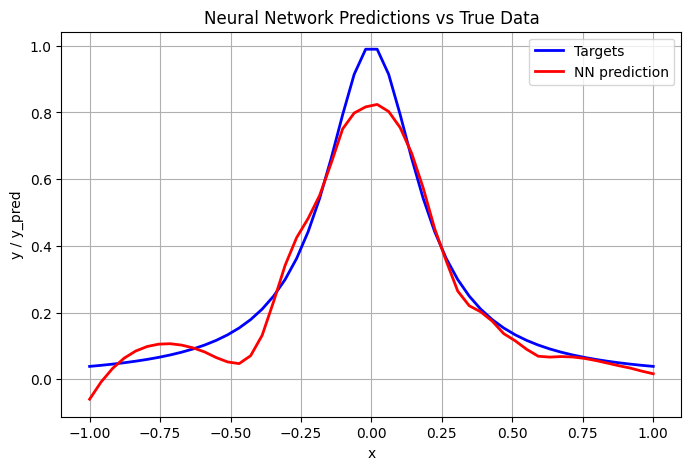

i = 70, j = 80
Validation loss: 0.003512142919223573
Final test loss: 0.005386454419620314
[[ 0.11690397]
 [ 0.08122596]
 [ 0.4287749 ]
 [-0.0100815 ]
 [ 0.24905945]
 [ 0.04484687]
 [ 0.79167486]
 [ 0.82067335]
 [ 0.26226454]
 [ 0.45896709]]


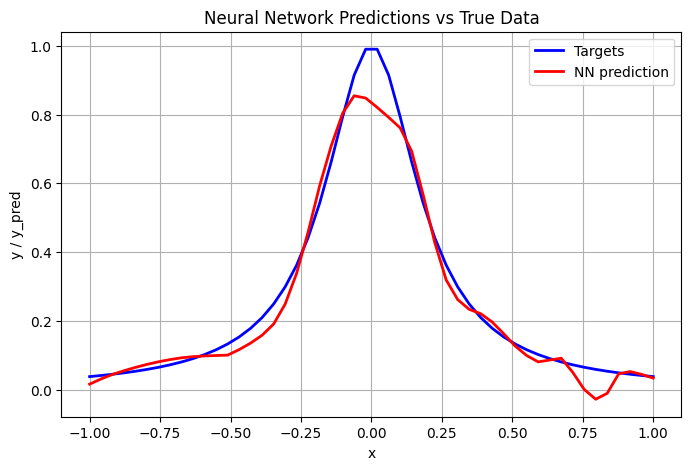

i = 70, j = 90
Validation loss: 0.005564394218654593
Final test loss: 0.0071211154525937185
[[0.1152923 ]
 [0.14525509]
 [0.50353077]
 [0.04583516]
 [0.29064151]
 [0.05414998]
 [0.75632523]
 [0.79906067]
 [0.28324412]
 [0.49081048]]


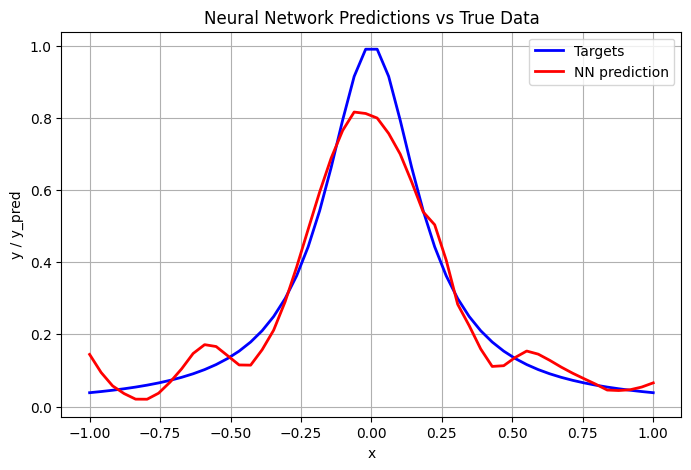

i = 70, j = 100
Validation loss: 0.001688941128626186
Final test loss: 0.006304009909402508
[[0.22429576]
 [0.12879661]
 [0.40516132]
 [0.05127493]
 [0.20117325]
 [0.05037284]
 [0.85269242]
 [0.87585766]
 [0.30943426]
 [0.27098232]]


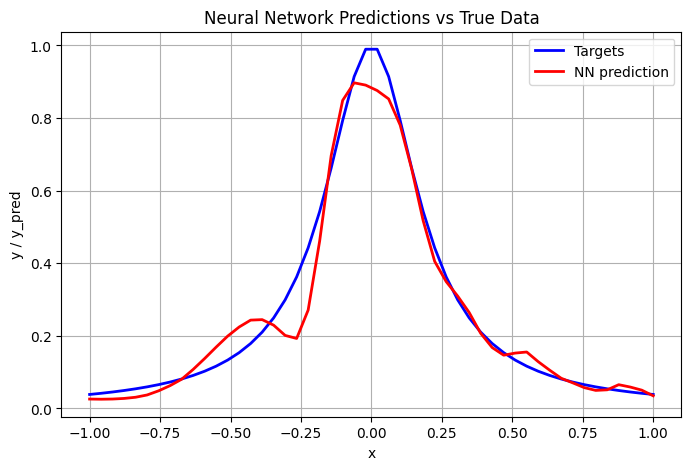

i = 80, j = 10
Validation loss: 0.00526564717698093
Final test loss: 0.009961732718567285
[[0.16941424]
 [0.13860194]
 [0.44832875]
 [0.06224681]
 [0.33947664]
 [0.03674078]
 [0.7287028 ]
 [0.75752391]
 [0.32895703]
 [0.52657485]]


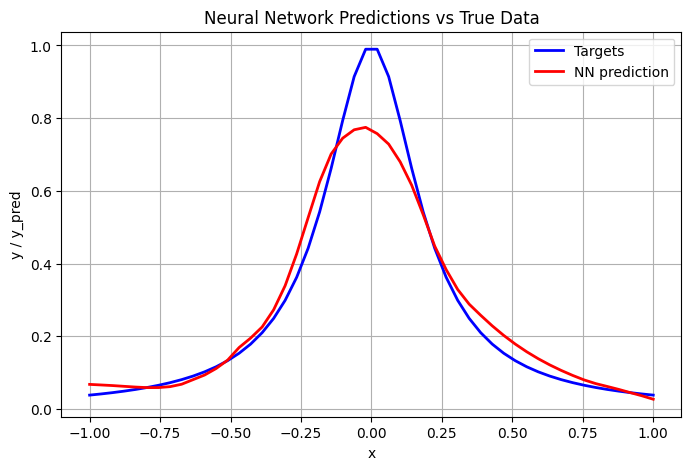

i = 80, j = 20
Validation loss: 0.02115291980524509
Final test loss: 0.027927947573647027
[[0.19323759]
 [0.00685574]
 [0.47164455]
 [0.0109778 ]
 [0.37016097]
 [0.01771989]
 [0.5907008 ]
 [0.60184395]
 [0.35945874]
 [0.48061504]]


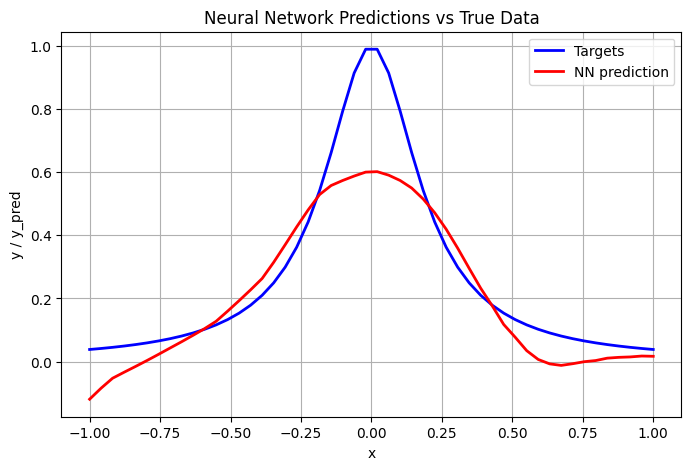

i = 80, j = 30
Validation loss: 0.00333812017429724
Final test loss: 0.0020775966129441825
[[0.19304343]
 [0.06252087]
 [0.49384817]
 [0.13739626]
 [0.27897318]
 [0.02548858]
 [0.86492708]
 [0.92488451]
 [0.32610784]
 [0.44517145]]


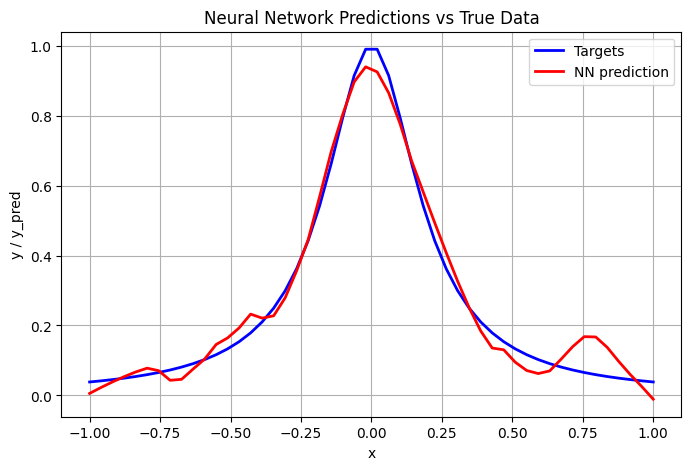

i = 80, j = 40
Validation loss: 0.005366017945338218
Final test loss: 0.007404515313005025
[[0.21843282]
 [0.16669873]
 [0.4959155 ]
 [0.11674064]
 [0.44656172]
 [0.0699119 ]
 [0.8478098 ]
 [0.85918447]
 [0.32383799]
 [0.56228811]]


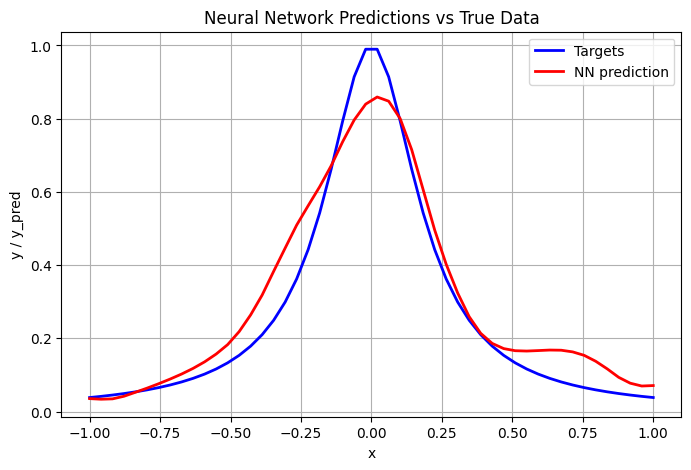

i = 80, j = 50
Validation loss: 0.0016722711909047036
Final test loss: 0.0027318149773011865
[[0.19581823]
 [0.05156123]
 [0.49378726]
 [0.11356295]
 [0.27786619]
 [0.06393295]
 [0.8406303 ]
 [0.88865255]
 [0.31200987]
 [0.44693232]]


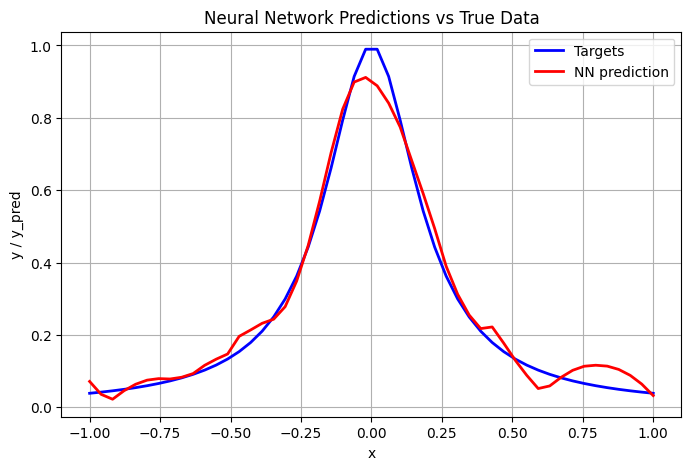

i = 80, j = 60
Validation loss: 0.003031711969048405
Final test loss: 0.004306896759565311
[[0.1260465 ]
 [0.09345889]
 [0.47411296]
 [0.02067041]
 [0.35837055]
 [0.00896726]
 [0.81236969]
 [0.84795615]
 [0.29299455]
 [0.51331308]]


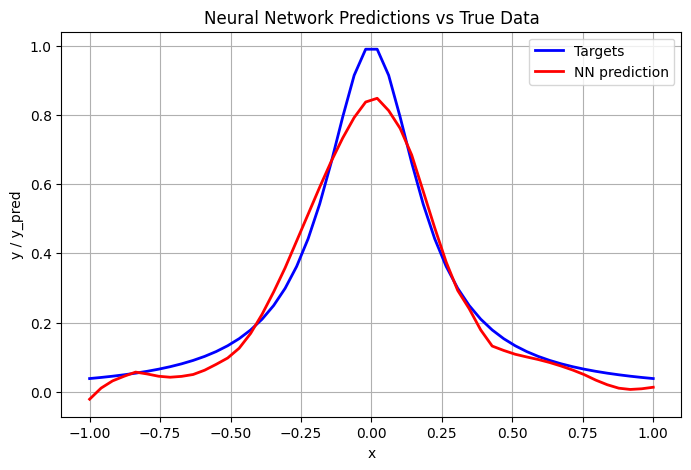

i = 80, j = 70
Validation loss: 0.0030807096230132374
Final test loss: 0.003385205521052064
[[0.10398526]
 [0.07929473]
 [0.3290438 ]
 [0.10908687]
 [0.23044713]
 [0.00618224]
 [0.90643383]
 [0.90393117]
 [0.26642644]
 [0.464341  ]]


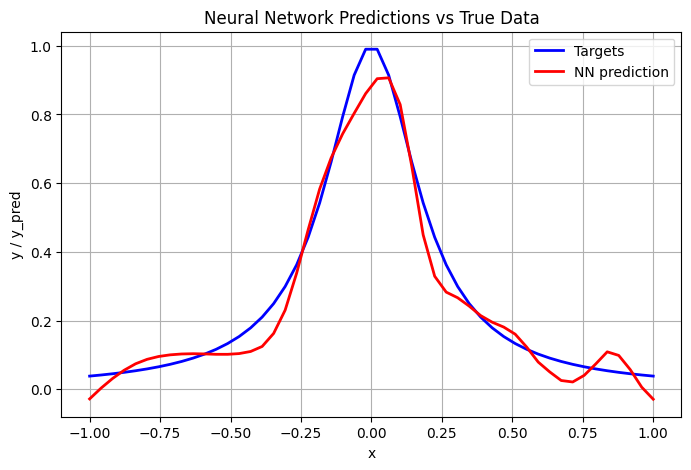

i = 80, j = 80
Validation loss: 0.0010284978647453079
Final test loss: 0.001325597359697156
[[0.10767464]
 [0.11268634]
 [0.40344986]
 [0.01364179]
 [0.29433257]
 [0.05627729]
 [0.88060296]
 [0.94025028]
 [0.26857009]
 [0.49841996]]


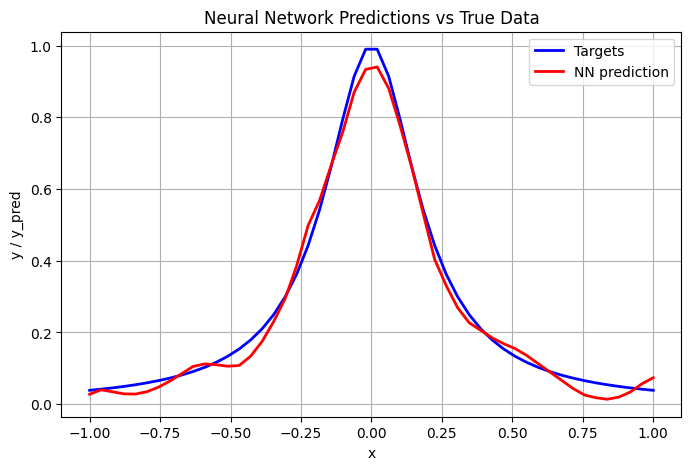

i = 80, j = 90
Validation loss: 0.0013944464195135857
Final test loss: 0.000657155474221148
[[0.1487035 ]
 [0.09054153]
 [0.4344652 ]
 [0.0651916 ]
 [0.25491799]
 [0.04511205]
 [0.8778318 ]
 [0.93709375]
 [0.30164819]
 [0.4305643 ]]


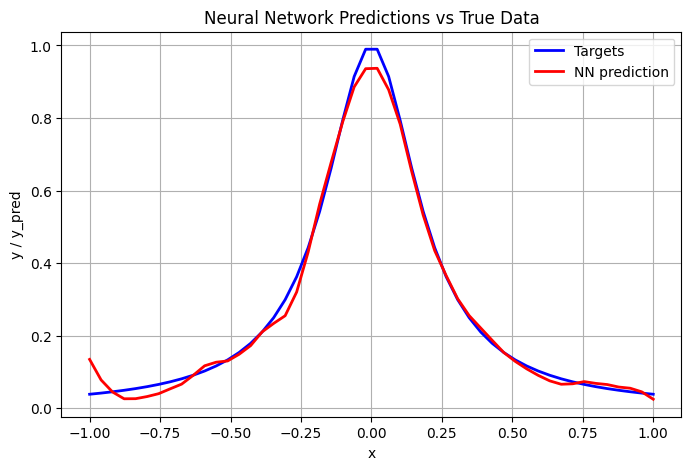

i = 80, j = 100
Validation loss: 0.0008366446935419542
Final test loss: 0.0013706796309499814
[[0.13336477]
 [0.11260743]
 [0.47247693]
 [0.0075958 ]
 [0.29490134]
 [0.05506876]
 [0.85639486]
 [0.91809921]
 [0.28256908]
 [0.40810709]]


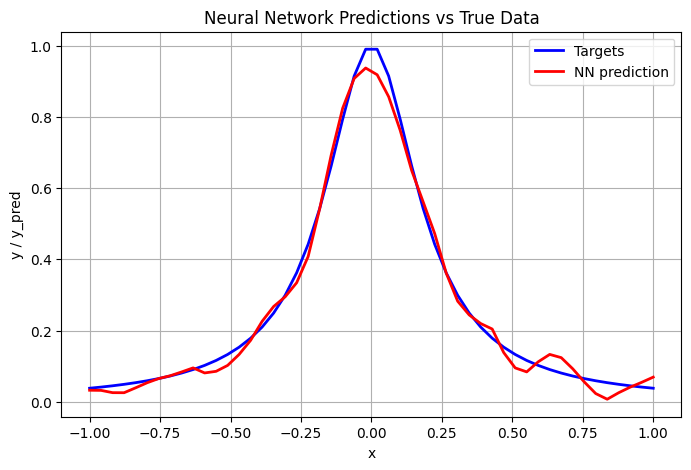

i = 90, j = 10
Validation loss: 0.007717036283100583
Final test loss: 0.011329039900519176
[[0.12210062]
 [0.06408337]
 [0.49535455]
 [0.02843706]
 [0.35980202]
 [0.06119236]
 [0.73086462]
 [0.73431857]
 [0.31470011]
 [0.50727771]]


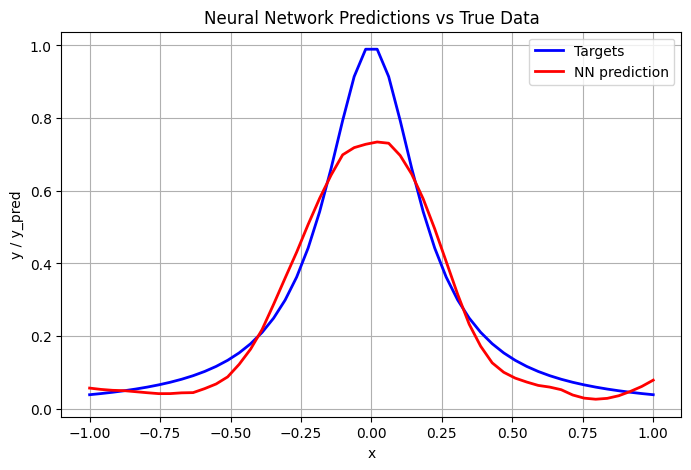

i = 90, j = 20
Validation loss: 0.006185662093810182
Final test loss: 0.009806970852165529
[[0.07606531]
 [0.09361095]
 [0.50528194]
 [0.06270828]
 [0.34113834]
 [0.03478738]
 [0.75125843]
 [0.76819049]
 [0.34837752]
 [0.53232169]]


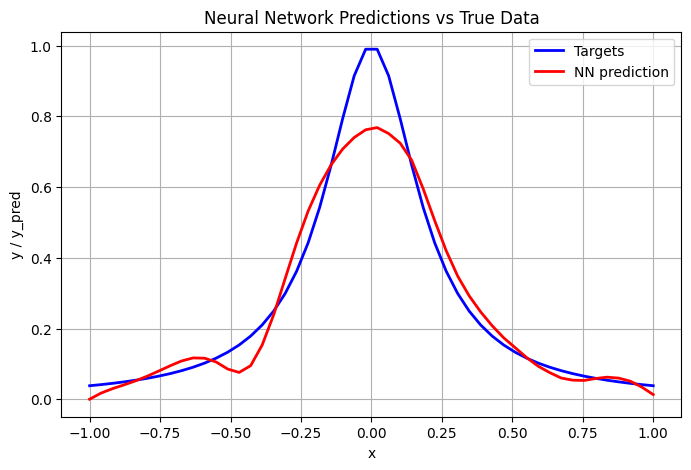

i = 90, j = 30
Validation loss: 0.0011205097830861742
Final test loss: 0.001253881763797701
[[0.10533404]
 [0.09175401]
 [0.42822136]
 [0.02674159]
 [0.30865372]
 [0.03554119]
 [0.87178354]
 [0.91612511]
 [0.32330316]
 [0.477235  ]]


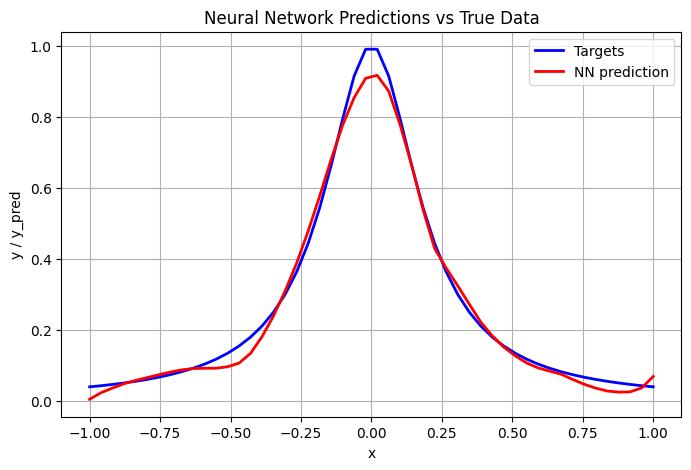

i = 90, j = 40
Validation loss: 0.00034256237813367604
Final test loss: 0.0005709256670144054
[[0.14621057]
 [0.11189523]
 [0.46136062]
 [0.07377776]
 [0.24775144]
 [0.04909044]
 [0.88961496]
 [0.95486085]
 [0.31634861]
 [0.44057454]]


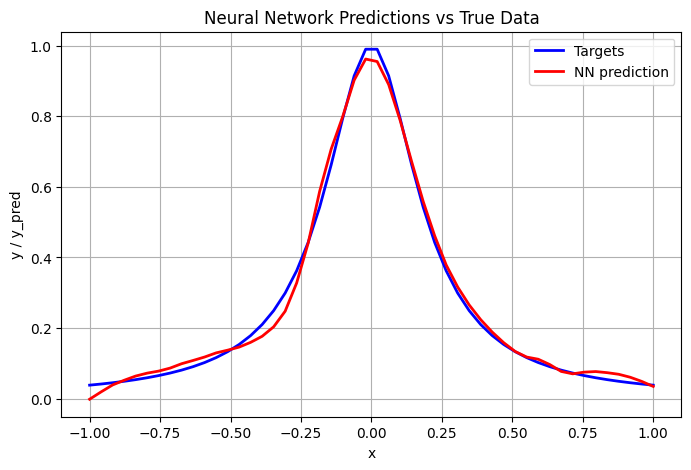

i = 90, j = 50
Validation loss: 0.0011718203847561554
Final test loss: 0.0019479290148791003
[[0.18991689]
 [0.11531537]
 [0.45753606]
 [0.04172802]
 [0.30370771]
 [0.02270754]
 [0.83809458]
 [0.89984499]
 [0.35507393]
 [0.45771984]]


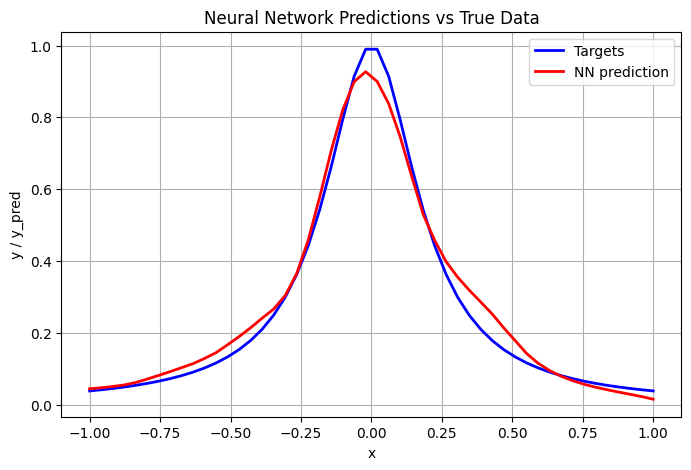

i = 90, j = 60
Validation loss: 0.0009522764714589814
Final test loss: 0.0005214143511302373
[[0.11560237]
 [0.12971951]
 [0.47246771]
 [0.04016395]
 [0.32000132]
 [0.05914993]
 [0.90814027]
 [0.96352439]
 [0.30068617]
 [0.46413982]]


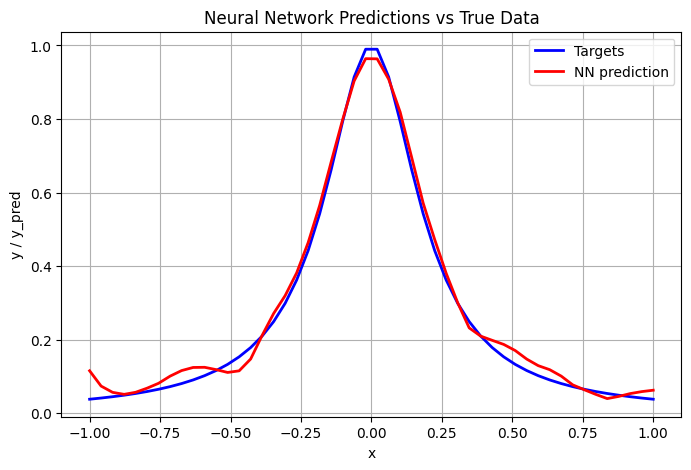

i = 90, j = 70
Validation loss: 0.00037398267483967614
Final test loss: 0.0020260618567579133
[[0.14996619]
 [0.12596946]
 [0.40877762]
 [0.05268835]
 [0.25767476]
 [0.05263682]
 [1.01491018]
 [1.06278166]
 [0.27549305]
 [0.46887963]]


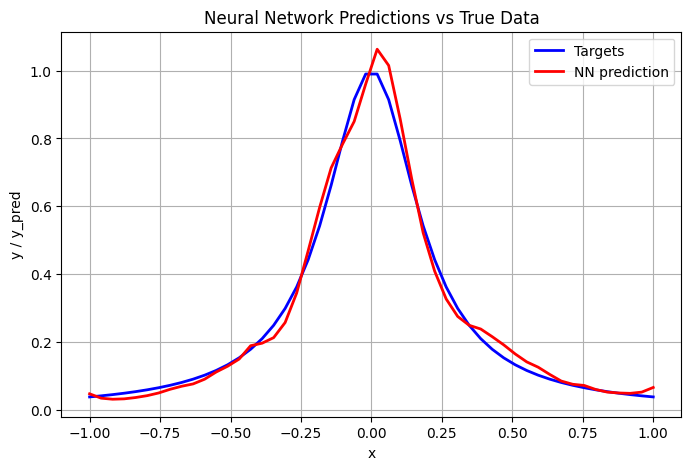

i = 90, j = 80
Validation loss: 0.0016017651144488768
Final test loss: 0.0023556311367955787
[[0.15153713]
 [0.11322266]
 [0.48912601]
 [0.07458191]
 [0.27717622]
 [0.03141594]
 [0.83207474]
 [0.8752553 ]
 [0.31704604]
 [0.45099792]]


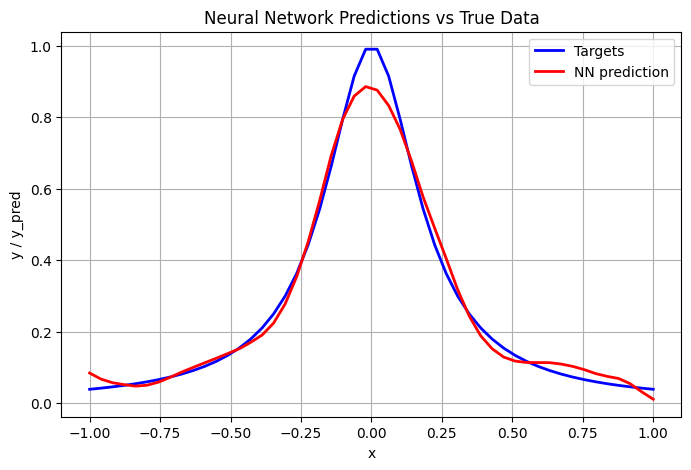

i = 90, j = 90
Validation loss: 0.002511777729210598
Final test loss: 0.0050917294217407765
[[0.21185717]
 [0.1949816 ]
 [0.3370619 ]
 [0.04114221]
 [0.28591214]
 [0.06764136]
 [1.03405796]
 [1.06974762]
 [0.23805156]
 [0.49110616]]


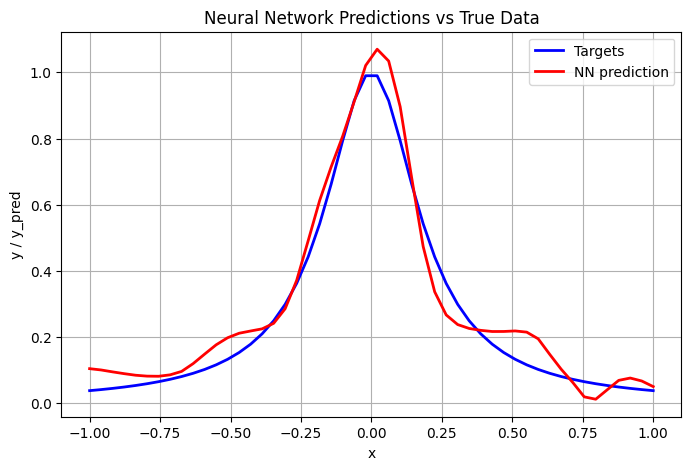

i = 90, j = 100
Validation loss: 0.001009615085858298
Final test loss: 0.0020091495213229306
[[0.13759244]
 [0.10581112]
 [0.50206864]
 [0.07147337]
 [0.30692506]
 [0.03129646]
 [0.82937343]
 [0.89810917]
 [0.30697834]
 [0.45422357]]


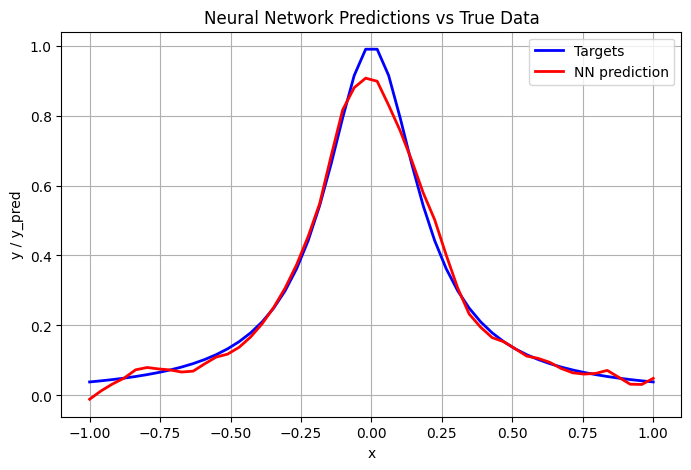

i = 100, j = 10
Validation loss: 0.0461665048477384
Final test loss: 0.06053190670394339
[[ 0.10994322]
 [ 0.32218974]
 [ 0.38336548]
 [ 0.15555255]
 [ 0.38129221]
 [-0.0522978 ]
 [ 0.43346628]
 [ 0.4558442 ]
 [ 0.36898426]
 [ 0.51086151]]


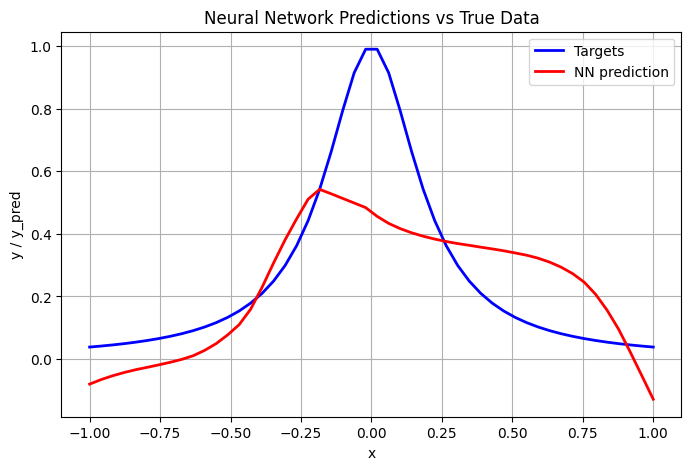

i = 100, j = 20
Validation loss: 0.00287233766891776
Final test loss: 0.004691610751996834
[[0.17292765]
 [0.12599154]
 [0.4517489 ]
 [0.01318373]
 [0.38813137]
 [0.02533748]
 [0.82501018]
 [0.84401227]
 [0.27048482]
 [0.52016645]]


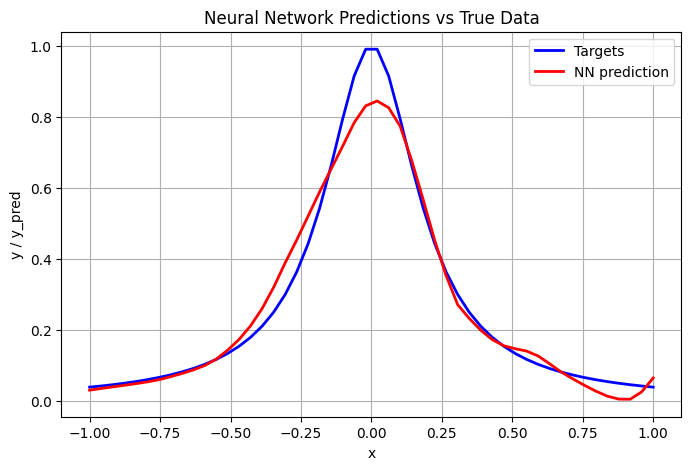

i = 100, j = 30
Validation loss: 0.002449822844900758
Final test loss: 0.004848354655869224
[[0.1294965 ]
 [0.04468285]
 [0.50661142]
 [0.07046947]
 [0.33804748]
 [0.08109014]
 [0.81338881]
 [0.85443509]
 [0.35418316]
 [0.51733429]]


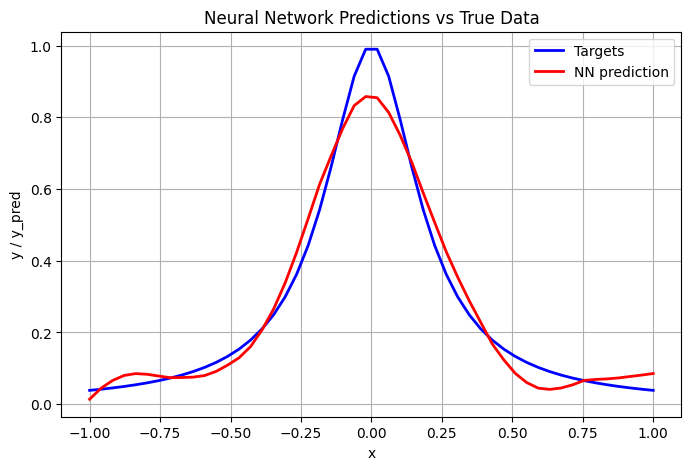

i = 100, j = 40
Validation loss: 0.0036353356377837056
Final test loss: 0.006149248502275212
[[0.06457848]
 [0.15548711]
 [0.45349293]
 [0.09280675]
 [0.31302996]
 [0.02595764]
 [0.80769778]
 [0.83640428]
 [0.32338547]
 [0.5575372 ]]


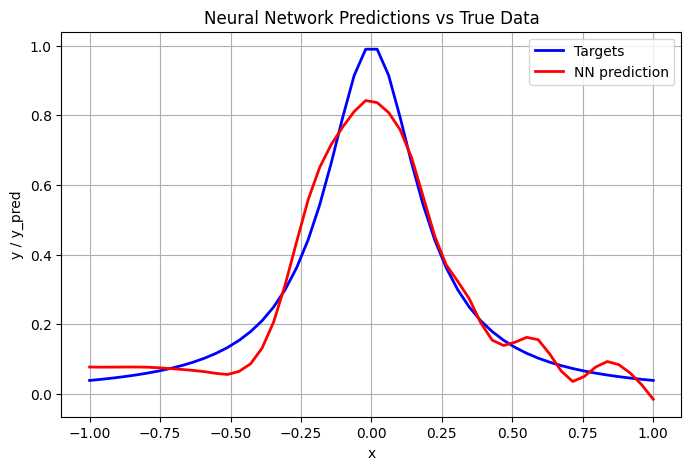

i = 100, j = 50
Validation loss: 0.0003041859718949532
Final test loss: 0.0007244339645497658
[[0.15752335]
 [0.09554976]
 [0.4558336 ]
 [0.05005527]
 [0.26980172]
 [0.03881309]
 [0.86877203]
 [0.92784522]
 [0.31389707]
 [0.44324905]]


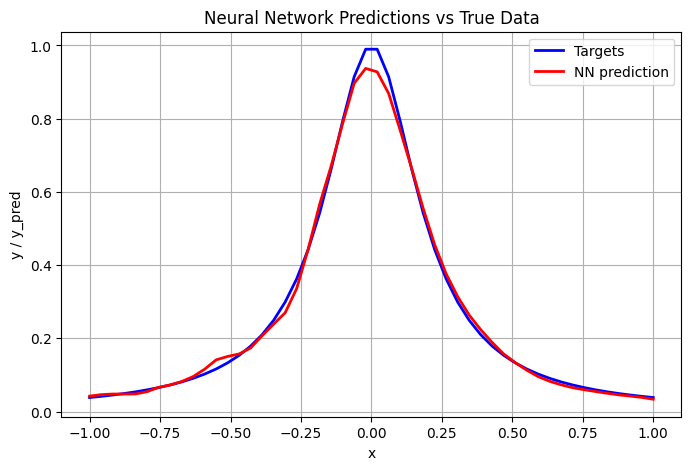

i = 100, j = 60
Validation loss: 0.0020642149386785437
Final test loss: 0.003180729440855718
[[0.06535001]
 [0.06921644]
 [0.50606452]
 [0.03810824]
 [0.34727714]
 [0.05012889]
 [0.83944286]
 [0.89316072]
 [0.30264007]
 [0.47831595]]


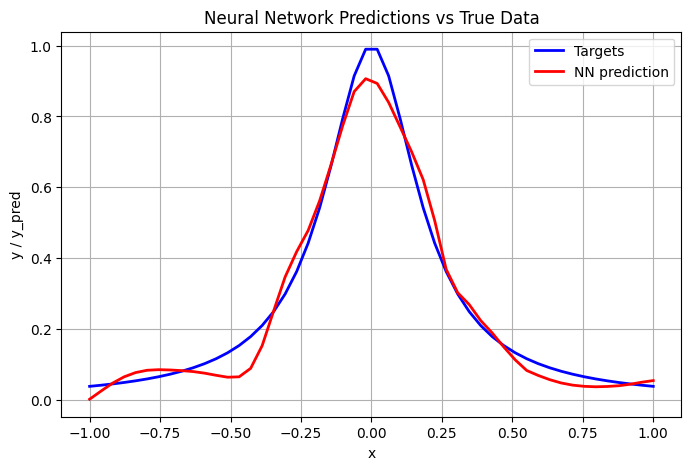

i = 100, j = 70
Validation loss: 0.001571840292006672
Final test loss: 0.0013779307125333308
[[0.14354777]
 [0.09472915]
 [0.44140775]
 [0.03917384]
 [0.24895655]
 [0.02757567]
 [0.86480664]
 [0.90766498]
 [0.26383545]
 [0.45827042]]


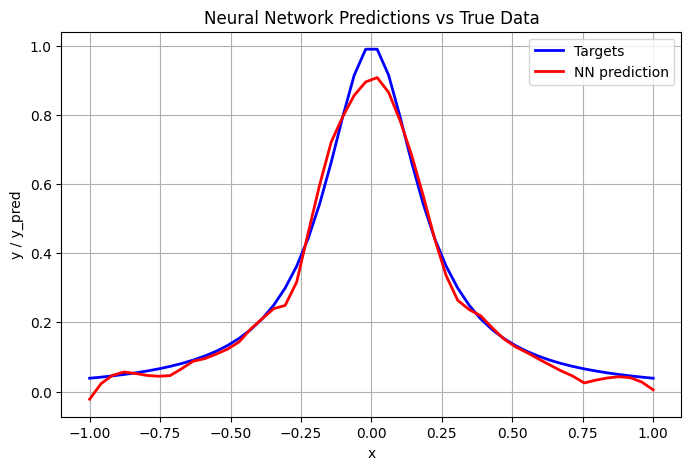

i = 100, j = 80
Validation loss: 0.0009937714252518434
Final test loss: 0.0009051628093073198
[[0.10587602]
 [0.11305516]
 [0.4136694 ]
 [0.04252616]
 [0.33238316]
 [0.01730443]
 [0.91022198]
 [0.95531592]
 [0.28995991]
 [0.4945814 ]]


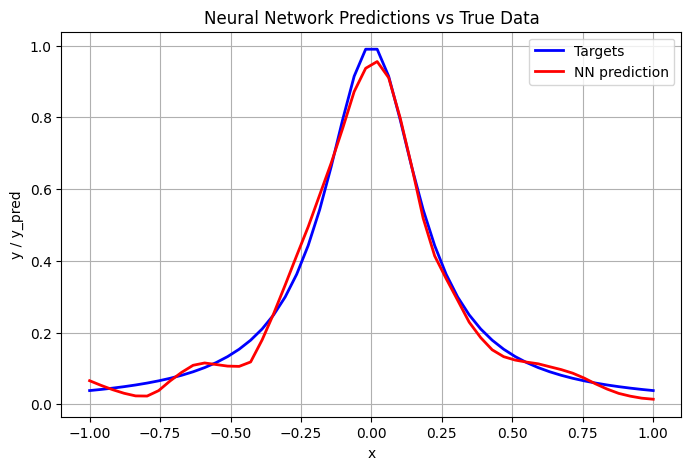

i = 100, j = 90
Validation loss: 0.0008891946619046395
Final test loss: 0.001535504731514019
[[0.1528606 ]
 [0.1248845 ]
 [0.47301072]
 [0.11245071]
 [0.29912465]
 [0.03039138]
 [0.87180355]
 [0.9068923 ]
 [0.3110587 ]
 [0.48222563]]


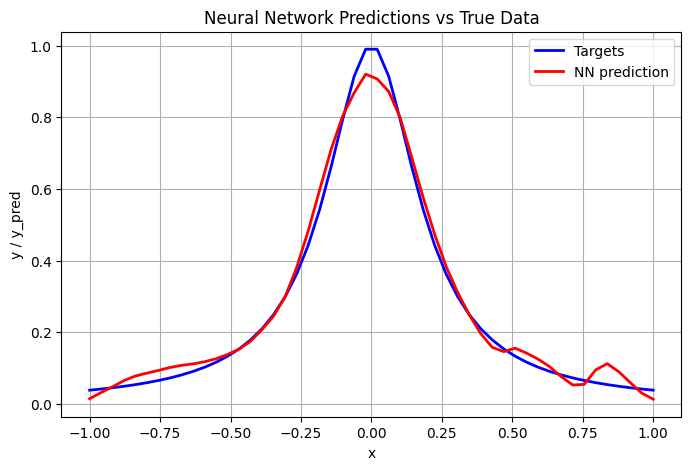

i = 100, j = 100
Validation loss: 0.001924937539815988
Final test loss: 0.001215905162866633
[[0.13468364]
 [0.11423376]
 [0.45580215]
 [0.01823902]
 [0.35520681]
 [0.07497047]
 [0.92605476]
 [0.97970528]
 [0.35252431]
 [0.49602415]]


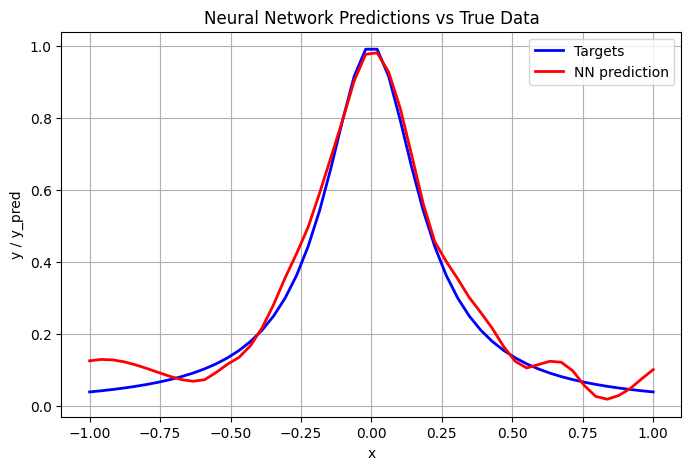

In [264]:
for i in range(10,110,10):
    #Initialize NN
    for j in range(10,110,10):
        print(f"i = {i}, j = {j}")
        nn = NeuralNetwork(
            network_input_size=X_train.shape[1],
            layer_output_sizes=[i, j, 1],
            activation_funcs=[af.ReLU, af.sigmoid, af.identity],
            cost_func=af.mse)


        train_network_stochastic_momentum(nn, X_train, y_train, eta=0.01, epochs=100)

        y_val_pred = nn.predict(X_val)
        val_loss = af.mse(y_val, y_val_pred)
        print("Validation loss:", val_loss)

        y_test_pred = nn.predict(X_test)
        test_loss = af.mse(y_test, y_test_pred)
        print("Final test loss:", test_loss)

        print(y_test_pred)

        plt.figure(figsize=(8, 5))
        plt.plot(x, y, color='blue', linewidth=2, label='Targets')
        plt.plot(x, nn.predict(x), color='red', linewidth=2, label='NN prediction')
        plt.title("Neural Network Predictions vs True Data")
        plt.xlabel("x")
        plt.ylabel("y / y_pred")
        plt.legend()
        plt.grid(True)
        plt.show()
